In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import json

# set dpi
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
datasets_path = Path('../../../../datasets/merged/all_constant_5hz/')

assert datasets_path.exists()
succeeded_df = {}
failures_df = {}

for print_path in datasets_path.glob('*'):
    print(print_path)

    csv_path = print_path / 'merged.csv.gz'

    if print_path.is_file() or not csv_path.exists():
        continue


    df = pd.read_csv(csv_path, index_col=0)

    with open(print_path / 'meta.json', 'r', encoding='utf-8') as f:
        meta = json.load(f)

    if meta['outcome'] == 'success':
        succeeded_df[print_path.name] = df
    else:
        failures_df[print_path.name] = df

success_df = pd.concat(succeeded_df.values())
failure_df = pd.concat(failures_df.values())
all_df = pd.concat([success_df, failure_df])


../../../../datasets/merged/all_constant_5hz/wallet_outer
../../../../datasets/merged/all_constant_5hz/meta.json
../../../../datasets/merged/all_constant_5hz/adj_earplug


../../../../datasets/merged/all_constant_5hz/wallet_inners
../../../../datasets/merged/all_constant_5hz/hinge_small
../../../../datasets/merged/all_constant_5hz/hinges_7
../../../../datasets/merged/all_constant_5hz/lily_58_frame
../../../../datasets/merged/all_constant_5hz/hinges_whistle
../../../../datasets/merged/all_constant_5hz/hinges_5
../../../../datasets/merged/all_constant_5hz/whistle
../../../../datasets/merged/all_constant_5hz/tunisian_crochet_4
../../../../datasets/merged/all_constant_5hz/fisheye_adapter_hinges
../../../../datasets/merged/all_constant_5hz/hinges_8
../../../../datasets/merged/all_constant_5hz/logitech_cam_mount
../../../../datasets/merged/all_constant_5hz/hinges_6
../../../../datasets/merged/all_constant_5hz/test_getraenkehalter
../../../../datasets/merged/all_constant_5hz/fisheye_adapter_2
../../../../datasets/merged/all_constant_5hz/yarn_bowl
../../../../datasets/merged/all_constant_5hz/led_and_zip_holder_v2
../../../../datasets/merged/all_constant_5hz/tuni

In [4]:
success_df

,datetime,extruder_power_power,extruder_target_target,extruder_temperature_temperature,extruder_velocity_velocity,gas_value,heater_power_power,heater_target_target,heater_temperature_temperature,accelerometer_x,...,position_x,position_y,position_z,position_e,position_target_x,position_target_y,position_target_z,position_target_e,velocity_velocity,velocity_target_velocity
0,1.685813e+09,0.410887,200.0,220.10,2.083333,259.0,1.0,70.0,35.04,-0.013916,...,390.0,260.0,15.65,3812.32335,390.0,260.0,15.65,3812.32335,30.0,1500.0
1,1.685813e+09,0.410887,200.0,220.10,2.083333,256.0,1.0,70.0,35.03,-0.013672,...,390.0,260.0,15.65,3812.32335,390.0,260.0,15.65,3812.32335,30.0,1500.0
2,1.685813e+09,0.410887,200.0,220.11,2.083333,252.0,1.0,70.0,35.02,-0.015625,...,390.0,260.0,15.65,3812.32335,390.0,260.0,15.65,3812.32335,30.0,1500.0
3,1.685813e+09,0.410887,200.0,220.11,2.083333,256.0,1.0,70.0,35.02,-0.012573,...,390.0,260.0,15.65,3812.32335,390.0,260.0,15.65,3812.32335,30.0,1500.0
4,1.685813e+09,0.410887,200.0,220.10,2.083333,256.0,1.0,70.0,35.03,-0.016113,...,390.0,260.0,15.65,3812.32335,390.0,260.0,15.65,3812.32335,30.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,1.681756e+09,0.000000,0.0,25.24,-1.000000,162.0,0.0,0.0,35.75,-0.019165,...,0.0,260.0,15.80,1894.17487,0.0,260.0,15.80,1894.17487,0.0,3000.0
15756,1.681756e+09,0.000000,0.0,25.24,-1.000000,162.0,0.0,0.0,35.74,-0.020264,...,0.0,260.0,15.80,1894.17487,0.0,260.0,15.80,1894.17487,0.0,3000.0
15757,1.681756e+09,0.000000,0.0,25.23,-1.000000,160.0,0.0,0.0,35.74,-0.019653,...,0.0,260.0,15.80,1894.17487,0.0,260.0,15.80,1894.17487,0.0,3000.0
15758,1.681756e+09,0.000000,0.0,25.23,-1.000000,164.0,0.0,0.0,35.74,-0.021362,...,0.0,260.0,15.80,1894.17487,0.0,260.0,15.80,1894.17487,0.0,3000.0


In [5]:
#failures_df[failure_df.isna().any(axis=1)]

In [6]:
failure_df

,datetime,extruder_power_power,extruder_target_target,extruder_temperature_temperature,extruder_velocity_velocity,gas_value,heater_power_power,heater_target_target,heater_temperature_temperature,accelerometer_x,...,position_x,position_y,position_z,position_e,position_target_x,position_target_y,position_target_z,position_target_e,velocity_velocity,velocity_target_velocity
0,1.685610e+09,1.000000,200.0,24.39,-10.022889,194.0,1.000000,60.0,23.46,-0.017944,...,390.000000,260.000000,24.9975,0.000000,390.000,260.000,24.9975,0.00000,30.0,2100.0
1,1.685610e+09,1.000000,200.0,24.40,-10.022889,195.0,1.000000,60.0,23.47,-0.016724,...,390.000000,260.000000,24.9975,0.000000,390.000,260.000,24.9975,0.00000,30.0,2100.0
2,1.685610e+09,1.000000,200.0,24.40,-10.022889,195.0,1.000000,60.0,23.48,-0.017700,...,390.000000,260.000000,24.9975,0.000000,390.000,260.000,24.9975,0.00000,30.0,2100.0
3,1.685610e+09,1.000000,200.0,24.40,-10.022889,188.0,1.000000,60.0,23.49,-0.017944,...,390.000000,260.000000,24.9975,0.000000,390.000,260.000,24.9975,0.00000,30.0,2100.0
4,1.685610e+09,1.000000,200.0,24.40,-10.022889,194.0,1.000000,60.0,23.49,-0.016479,...,390.000000,260.000000,24.9975,0.000000,390.000,260.000,24.9975,0.00000,30.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,1.683387e+09,0.502043,200.0,199.98,1.330411,174.0,0.320803,NaN,60.01,-0.018311,...,143.125342,122.760475,1.4000,820.615334,158.650,135.457,1.4000,824.30972,40.0,2400.0
5731,1.683387e+09,0.508354,200.0,199.98,1.330400,190.0,0.320803,NaN,60.01,-0.019043,...,145.315012,124.385012,1.4000,820.887932,158.650,135.457,1.4000,824.30972,40.0,2400.0
5732,1.683387e+09,0.508354,200.0,199.98,1.330400,172.0,0.320803,NaN,60.01,-0.016968,...,152.406468,131.476468,1.4000,821.221491,144.678,120.919,1.4000,824.97431,40.0,2400.0
5733,1.683387e+09,0.508354,200.0,199.98,1.330400,171.0,0.320803,NaN,60.01,-0.015259,...,152.406468,131.476468,1.4000,821.221491,144.678,120.919,1.4000,824.97431,40.0,2400.0


# Cross correlation


In [7]:
from IPython.display import Markdown, display
display(Markdown('## Successes'))

# cross correlation
success_df.corr().style.background_gradient(cmap='coolwarm')

## Successes

/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,datetime,extruder_power_power,extruder_target_target,extruder_temperature_temperature,extruder_velocity_velocity,gas_value,heater_power_power,heater_target_target,heater_temperature_temperature,accelerometer_x,accelerometer_y,accelerometer_z,magnetometer_x,magnetometer_y,magnetometer_z,gyroscope_x,gyroscope_y,gyroscope_z,mcu_upcoming_bytes,mcu_srtt,mcu_bytes_invalid,mcu_send_seq,mcu_retransmit_seq,mcu_rttvar,mcu_rto,mcu_bytes_retransmit,mcu_bytes_write,mcu_ready_bytes,mcu_freq,mcu_receive_seq,position_x,position_y,position_z,position_e,position_target_x,position_target_y,position_target_z,position_target_e,velocity_velocity,velocity_target_velocity
datetime,1.000000,-0.170539,0.067815,0.115972,-0.017835,0.019101,0.120743,0.186916,0.335066,0.158540,0.051370,-0.098113,-0.570150,-0.352977,0.216054,0.410486,-0.019464,-0.223492,0.018298,-0.027783,nan,-0.136075,nan,-0.038100,nan,nan,-0.164453,-0.031613,-0.026429,-0.136075,0.040727,-0.036803,-0.186198,-0.237076,0.011565,-0.058560,-0.184926,-0.237120,0.106528,0.058895
extruder_power_power,-0.170539,1.000000,0.542327,0.317403,0.105021,-0.002211,0.741746,0.372796,0.295420,-0.020860,-0.005703,0.059925,-0.132726,-0.247117,0.163258,-0.081846,0.006895,0.035502,0.015946,-0.019215,nan,-0.073618,nan,-0.024463,nan,nan,-0.071764,0.062306,-0.087980,-0.073618,0.728941,-0.546855,-0.035252,0.029260,0.771880,-0.477916,-0.031648,0.029352,0.289643,-0.115331
extruder_target_target,0.067815,0.542327,1.000000,0.407562,0.091698,-0.070217,0.433744,0.751553,0.380206,0.029053,0.009830,0.017654,-0.222668,-0.288506,0.167459,0.032414,-0.014331,-0.024657,0.079567,-0.006406,nan,0.112697,nan,-0.001960,nan,nan,0.112972,0.050115,-0.152737,0.112696,0.403410,-0.443843,-0.063481,0.207335,0.414013,-0.418107,-0.062024,0.207523,0.353163,0.047667
extruder_temperature_temperature,0.115972,0.317403,0.407562,1.000000,0.069719,-0.299036,0.103191,0.300977,0.765572,0.038157,0.000013,-0.012685,-0.394025,-0.145563,0.135810,0.404151,-0.000334,-0.149671,0.065158,-0.021025,nan,0.044055,nan,-0.022864,nan,nan,0.025944,0.101099,-0.611890,0.044055,0.156874,-0.580829,-0.210844,0.091461,0.095532,-0.625073,-0.211538,0.091655,0.316363,0.002366
extruder_velocity_velocity,-0.017835,0.105021,0.091698,0.069719,1.000000,-0.003430,0.077426,0.078905,0.053079,0.000875,-0.003089,0.005612,-0.009050,-0.026588,0.028044,0.011236,0.001175,-0.004566,0.006420,-0.002230,nan,-0.010716,nan,-0.004859,nan,nan,-0.011079,0.013889,-0.024747,-0.010716,0.079317,-0.072993,-0.000745,0.027887,0.073582,-0.080716,-0.000549,0.027903,0.066491,-0.003832
gas_value,0.019101,-0.002211,-0.070217,-0.299036,-0.003430,1.000000,0.176911,0.005808,-0.229564,-0.041955,-0.010689,0.066188,0.251007,-0.109540,0.044429,-0.288952,0.019058,0.112899,-0.035960,0.065183,nan,-0.306328,nan,0.091375,nan,nan,-0.285893,-0.027813,0.469661,-0.306328,0.076624,0.043148,-0.065707,-0.225671,0.115048,0.074281,-0.064772,-0.225677,-0.065699,-0.043501
heater_power_power,0.120743,0.741746,0.433744,0.103191,0.077426,0.176911,1.000000,0.384847,0.208725,0.023265,0.004453,0.040407,-0.188893,-0.400141,0.213449,-0.071717,0.005563,0.015165,0.003650,-0.017142,nan,-0.144675,nan,-0.026647,nan,nan,-0.150510,0.014400,0.046508,-0.144675,0.606807,-0.384443,-0.071740,-0.076006,0.668704,-0.295820,-0.066652,-0.075955,0.212893,-0.110648
heater_target_target,0.186916,0.372796,0.751553,0.300977,0.078905,0.005808,0.384847,1.000000,0.381697,0.054831,0.002742,-0.004543,-0.130522,-0.356971,0.158484,0.166729,-0.001491,-0.079769,0.105323,0.000894,nan,0.044964,nan,0.004135,nan,nan,0.046662,0.037117,-0.087908,0.044964,0.278362,-0.359563,-0.001450,0.236517,0.305892,-0.320619,-0.000916,0.236678,0.321616,0.082590
heater_temperature_temperature,0.335066,0.295420,0.380206,0.765572,0.053079,-0.229564,0.208725,0.381697,1.000000,0.077405,0.000911,-0.015444,-0.437809,-0.369369,0.098699,0.486360,-0.006533,-0.209345,0.061417,-0.030843,nan,0.009016,nan,-0.045249,nan,nan,-0.018622,0.066567,-0.542663,0.009015,0.158557,-0.497929,-0.191661,0.067749,0.171

In [8]:
from IPython.display import Markdown, display
display(Markdown('## Failures'))

# cross correlation with coloring
failure_df.corr().style.background_gradient(cmap='coolwarm')


## Failures

,datetime,extruder_power_power,extruder_target_target,extruder_temperature_temperature,extruder_velocity_velocity,gas_value,heater_power_power,heater_target_target,heater_temperature_temperature,accelerometer_x,accelerometer_y,accelerometer_z,magnetometer_x,magnetometer_y,magnetometer_z,gyroscope_x,gyroscope_y,gyroscope_z,mcu_upcoming_bytes,mcu_srtt,mcu_bytes_invalid,mcu_send_seq,mcu_retransmit_seq,mcu_rttvar,mcu_rto,mcu_bytes_retransmit,mcu_bytes_write,mcu_ready_bytes,mcu_freq,mcu_receive_seq,position_x,position_y,position_z,position_e,position_target_x,position_target_y,position_target_z,position_target_e,velocity_velocity,velocity_target_velocity
datetime,1.000000,-0.239606,-0.109106,0.063804,0.192793,-0.164462,0.135048,0.276377,0.291007,0.112389,-0.021443,-0.062802,-0.302491,-0.413816,0.211510,0.238776,-0.008364,-0.221049,0.213841,nan,nan,-0.243644,nan,0.005027,nan,nan,-0.273547,-0.073479,0.072009,-0.243643,-0.064363,-0.267065,0.012568,-0.298881,0.046899,-0.151512,0.014377,-0.299615,0.158413,0.282300
extruder_power_power,-0.239606,1.000000,0.624694,-0.533836,-0.433533,0.230242,0.673467,0.494022,-0.316534,-0.047556,0.015779,0.034198,0.294547,-0.151629,0.230881,-0.281383,-0.006971,0.141552,-0.108772,nan,nan,0.072954,nan,-0.012488,nan,nan,0.088697,0.002203,0.404016,0.072953,0.674414,0.011567,0.078293,0.073434,0.627452,0.000361,0.076907,0.073014,0.056548,-0.226277
extruder_target_target,-0.109106,0.624694,1.000000,0.232223,-0.094662,-0.016069,0.501914,0.966756,0.273710,0.017660,-0.018838,0.009584,-0.069313,-0.310973,0.371072,0.057994,-0.012683,0.003854,0.094807,nan,nan,0.173938,nan,0.007644,nan,nan,0.188667,0.101647,0.015897,0.173938,0.443176,-0.422234,0.018912,0.216879,0.435796,-0.406099,0.019125,0.217598,0.379471,0.070937
extruder_temperature_temperature,0.063804,-0.533836,0.232223,1.000000,0.372672,-0.379061,-0.468635,0.312759,0.658740,0.058521,-0.036574,-0.047306,-0.361762,0.011315,-0.023922,0.372441,-0.008099,-0.149127,0.167151,nan,nan,0.129032,nan,0.020080,nan,nan,0.114267,0.107050,-0.443851,0.129032,-0.395360,-0.338973,-0.084626,0.153592,-0.336758,-0.301706,-0.082762,0.155010,0.231722,0.303155
extruder_velocity_velocity,0.192793,-0.433533,-0.094662,0.372672,1.000000,0.082951,-0.243554,0.009899,0.242908,0.070554,-0.021723,0.016642,-0.054296,-0.005943,0.005735,0.055535,-0.021380,-0.042810,0.083496,nan,nan,0.168370,nan,-0.009417,nan,nan,0.164883,0.023949,0.043733,0.168371,-0.059478,-0.398516,-0.037824,0.187838,-0.039935,-0.379730,-0.038872,0.188402,0.172938,0.151901
gas_value,-0.164462,0.230242,-0.016069,-0.379061,0.082951,1.000000,0.126607,-0.108389,-0.371253,-0.014883,0.008987,0.204438,0.259624,0.079753,-0.047372,-0.391391,0.035984,0.248201,-0.094608,nan,nan,-0.334537,nan,-0.019399,nan,nan,-0.280813,-0.018706,0.389840,-0.334537,0.330053,-0.101828,0.005053,-0.263403,0.183478,-0.234092,0.003529,-0.264313,-0.073575,-0.242062
heater_power_power,0.135048,0.673467,0.501914,-0.468635,-0.243554,0.126607,1.000000,0.484965,-0.419055,0.010644,0.004622,-0.003698,0.140541,-0.368452,0.379622,-0.223972,-0.022864,0.039227,-0.052822,nan,nan,-0.076066,nan,-0.023272,nan,nan,-0.079449,-0.036979,0.396311,-0.076066,0.375234,-0.247018,0.046851,-0.102245,0.586989,0.007044,0.045878,-0.103219,0.079523,0.008213
heater_target_target,0.276377,0.494022,0.966756,0.312759,0.009899,-0.108389,0.484965,1.000000,0.361679,0.060976,-0.031971,-0.019672,-0.191604,-0.450939,0.432089,0.143538,-0.017699,-0.096386,0.157736,nan,nan,0.071183,nan,0.009700,nan,nan,0.067946,0.107962,0.031870,0.071183,0.347336,-0.518617,-0.014224,0.087557,0.382790,-0.458863,-0.013991,0.088041,0.404711,0.178591
heater_temperature_temperature,0.291007,-0.316534,0.273710,0.658740,0.242908,-0.371253,-0.419055,0.361679,1.000000,0.064595,-0.041078,-0.007775,-0.398915,-0.134054,0.056255,0.443756,0.024655,-0.151173,0.244955,nan,nan,-0.030241,nan,0.028744,nan,nan,-0.031519,0.080731,-0.370638,-0.030240,-0.138905,-0.208785,-0.075528,0.000678,-0.284686,-0.378387,-0.073759,0.001142,0.259033,0.203278

/tmp/ipykernel_248878/4134092978.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


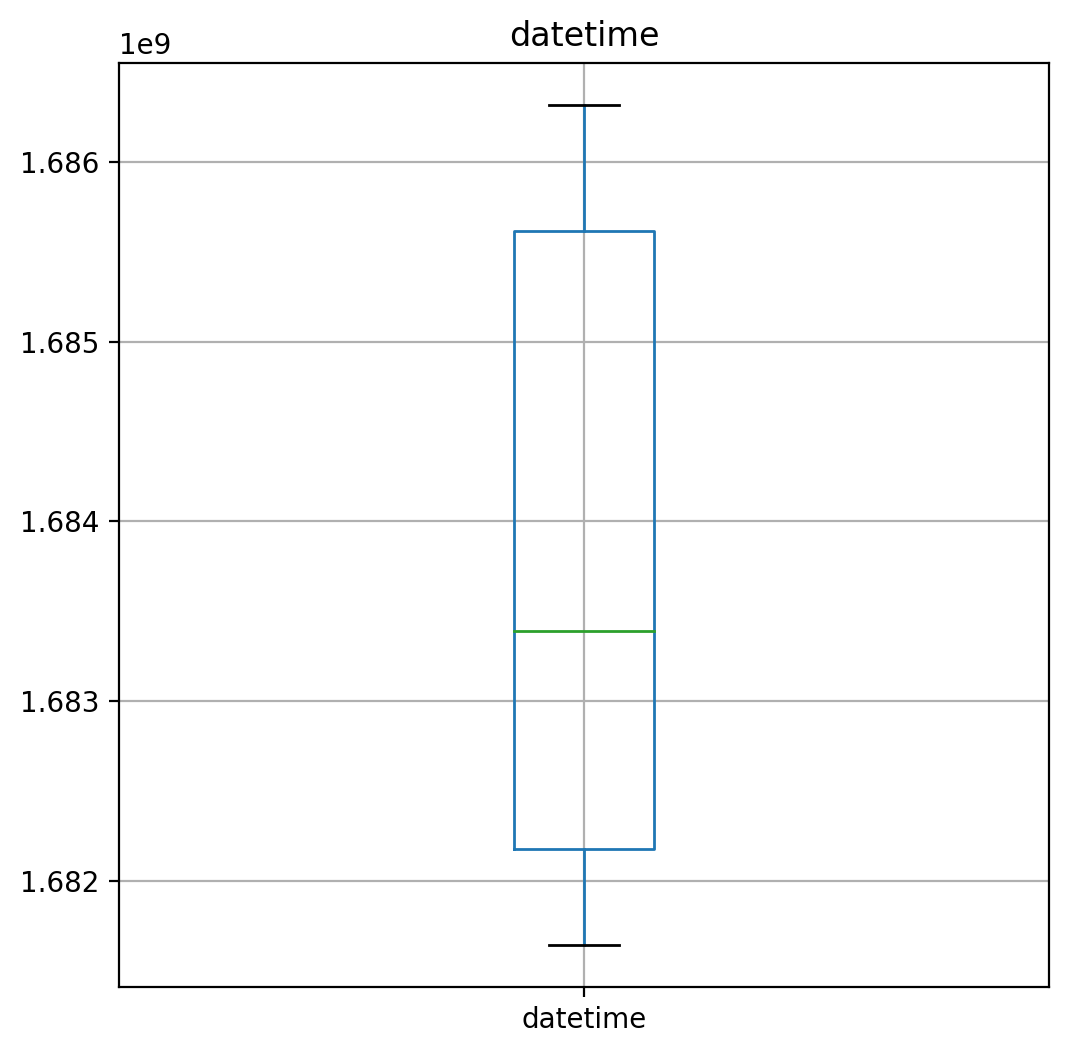

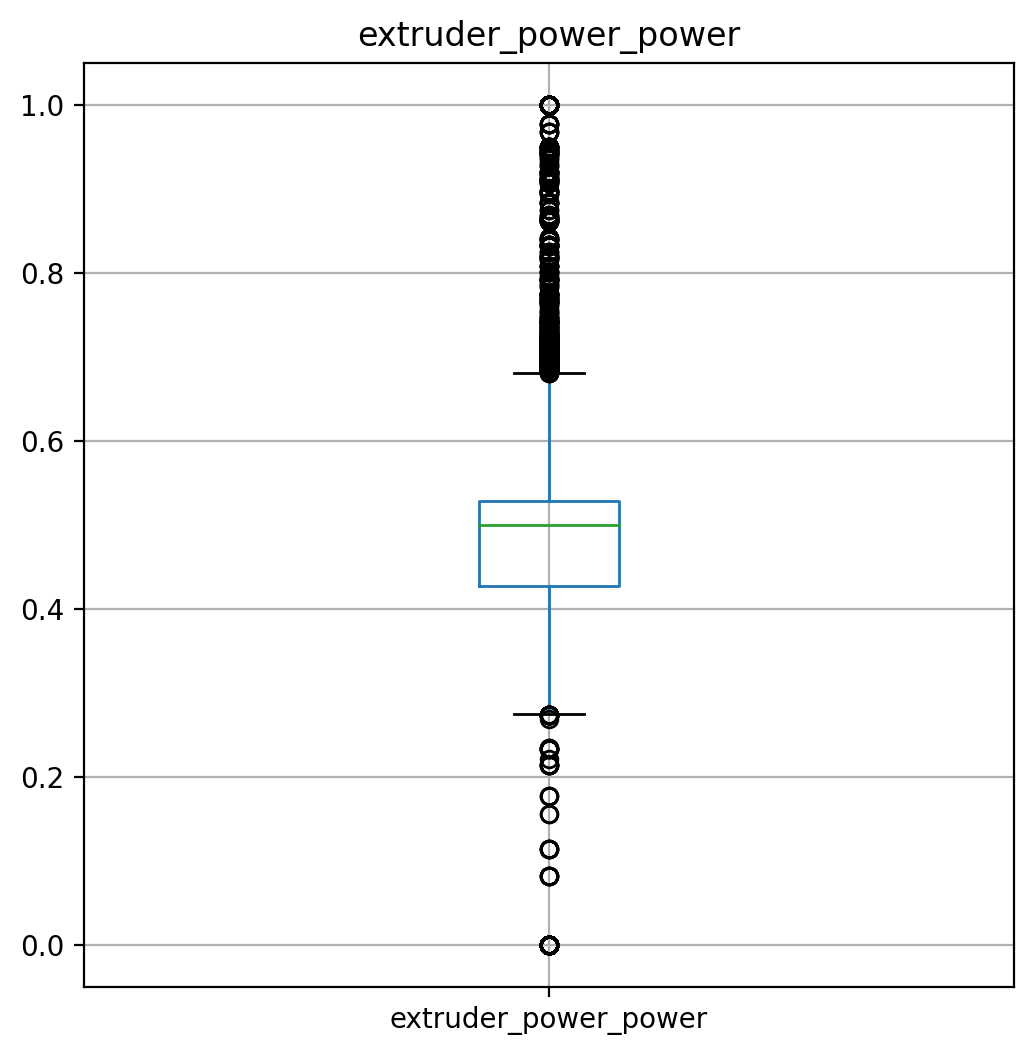

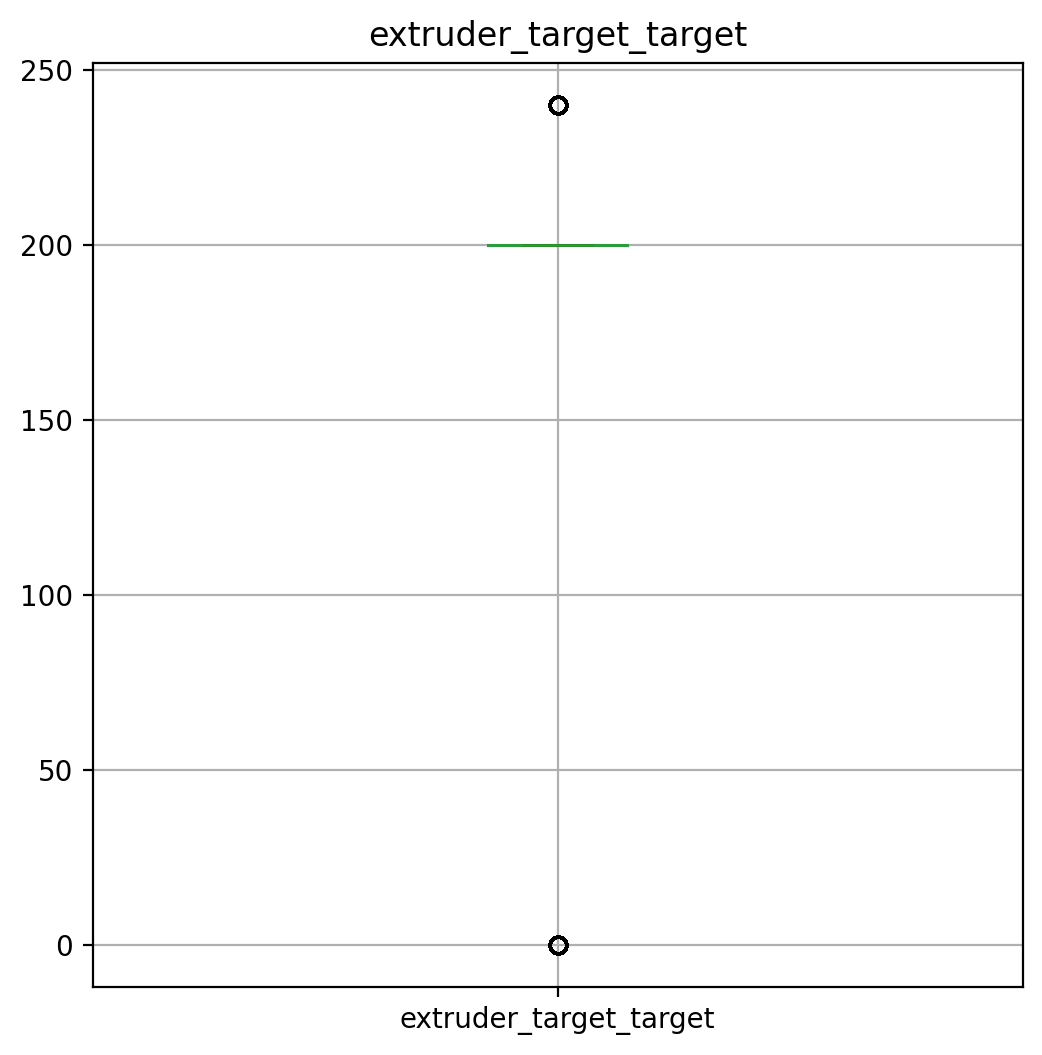

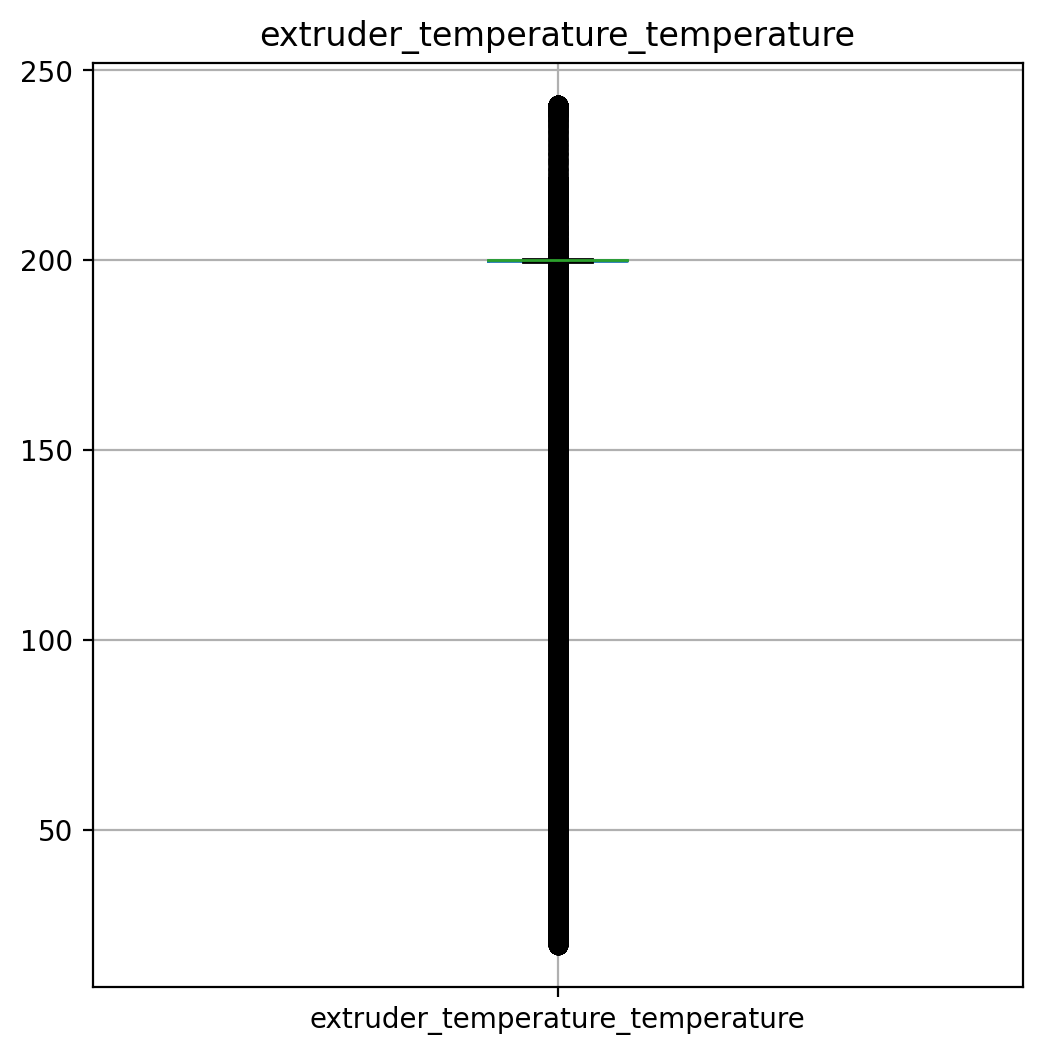

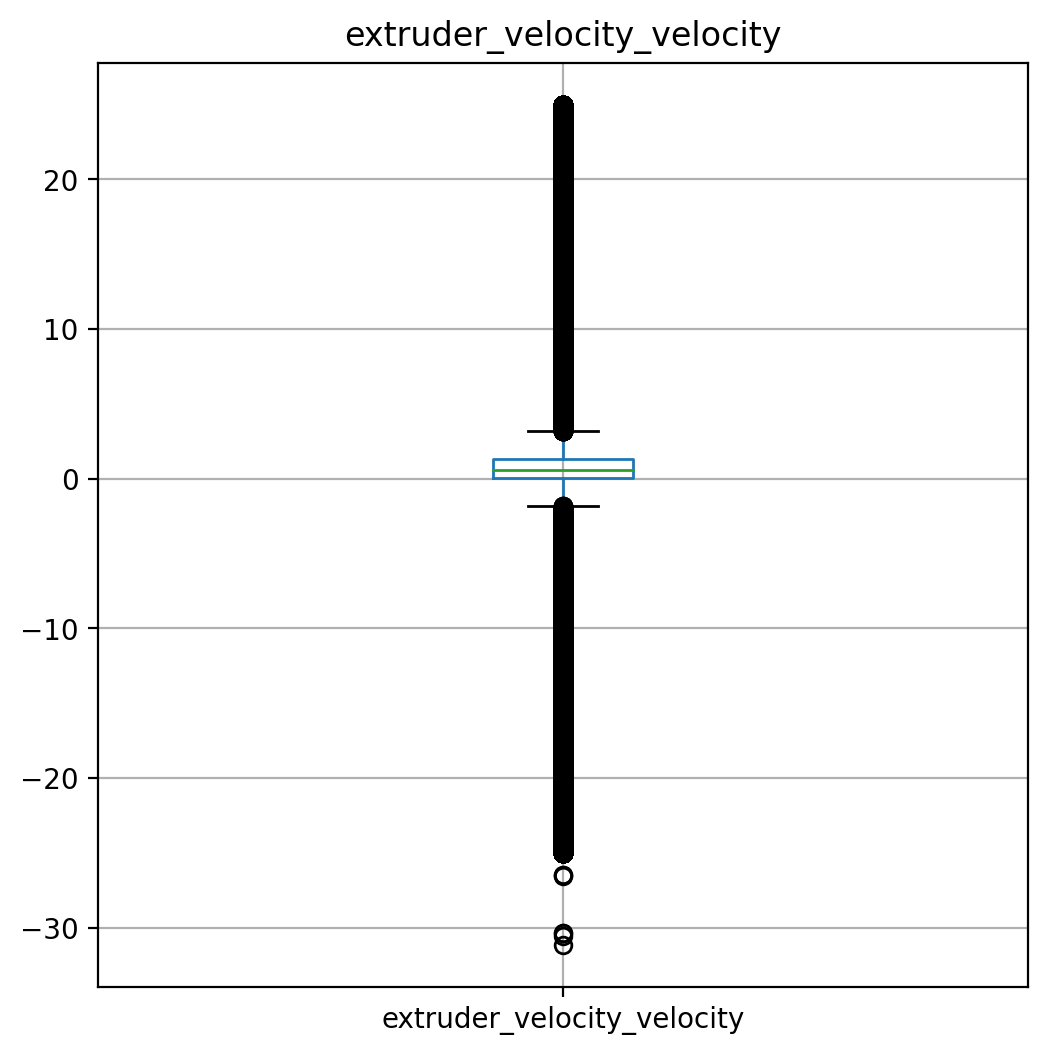

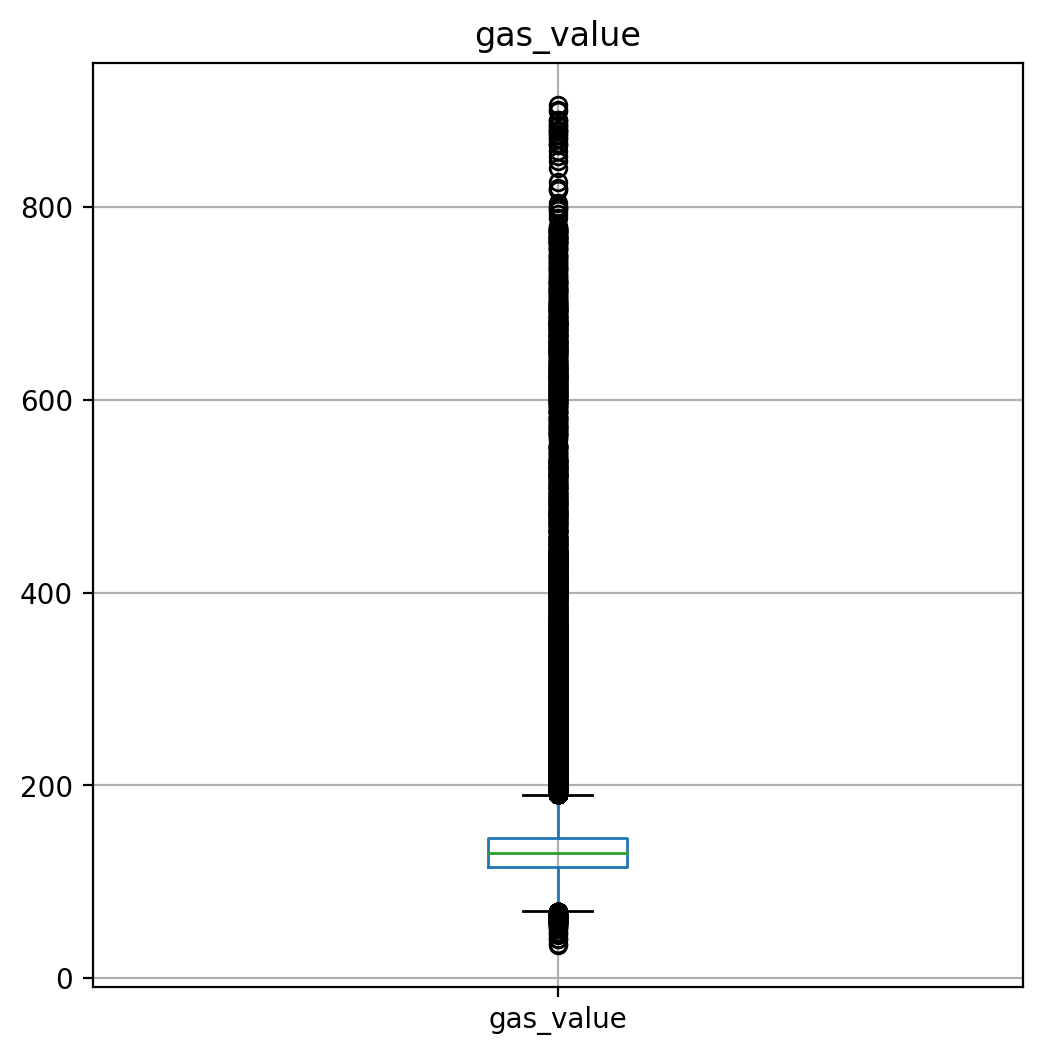

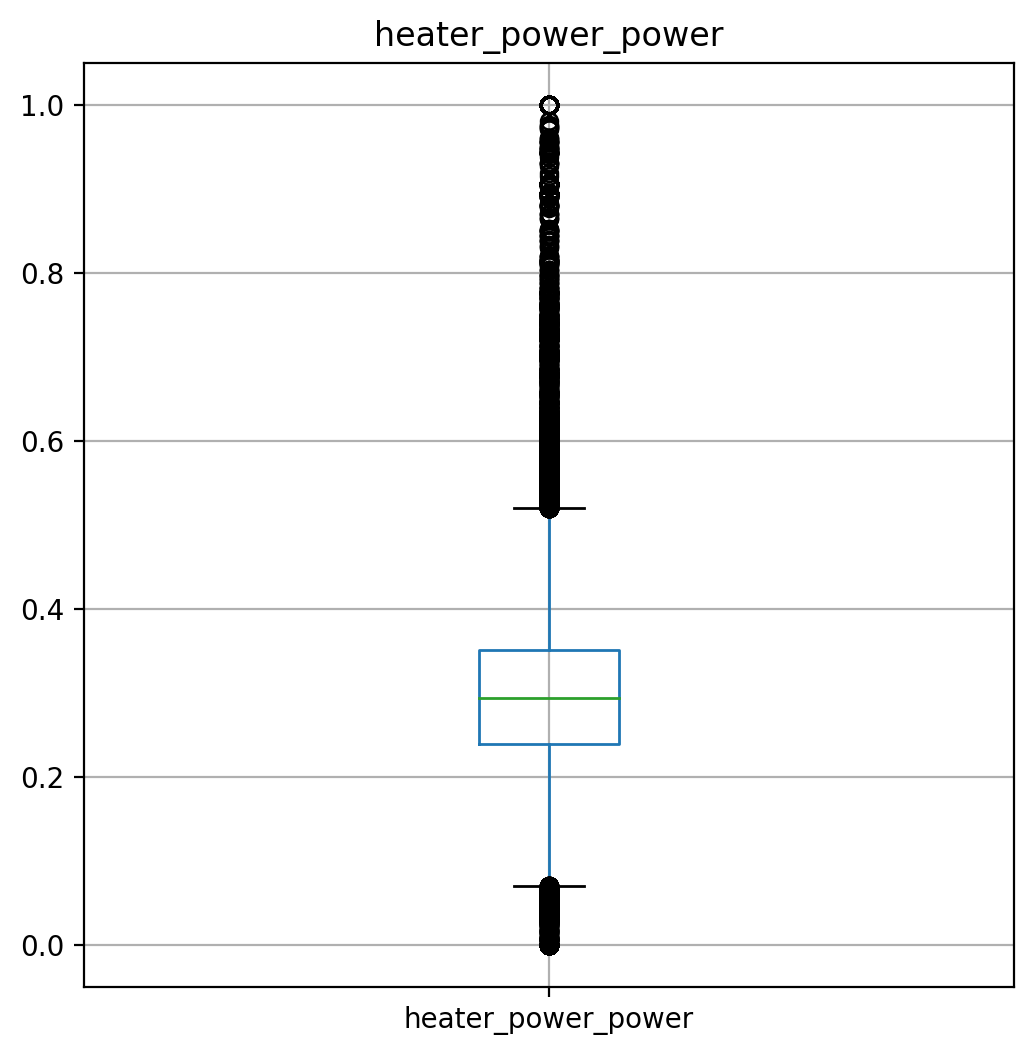

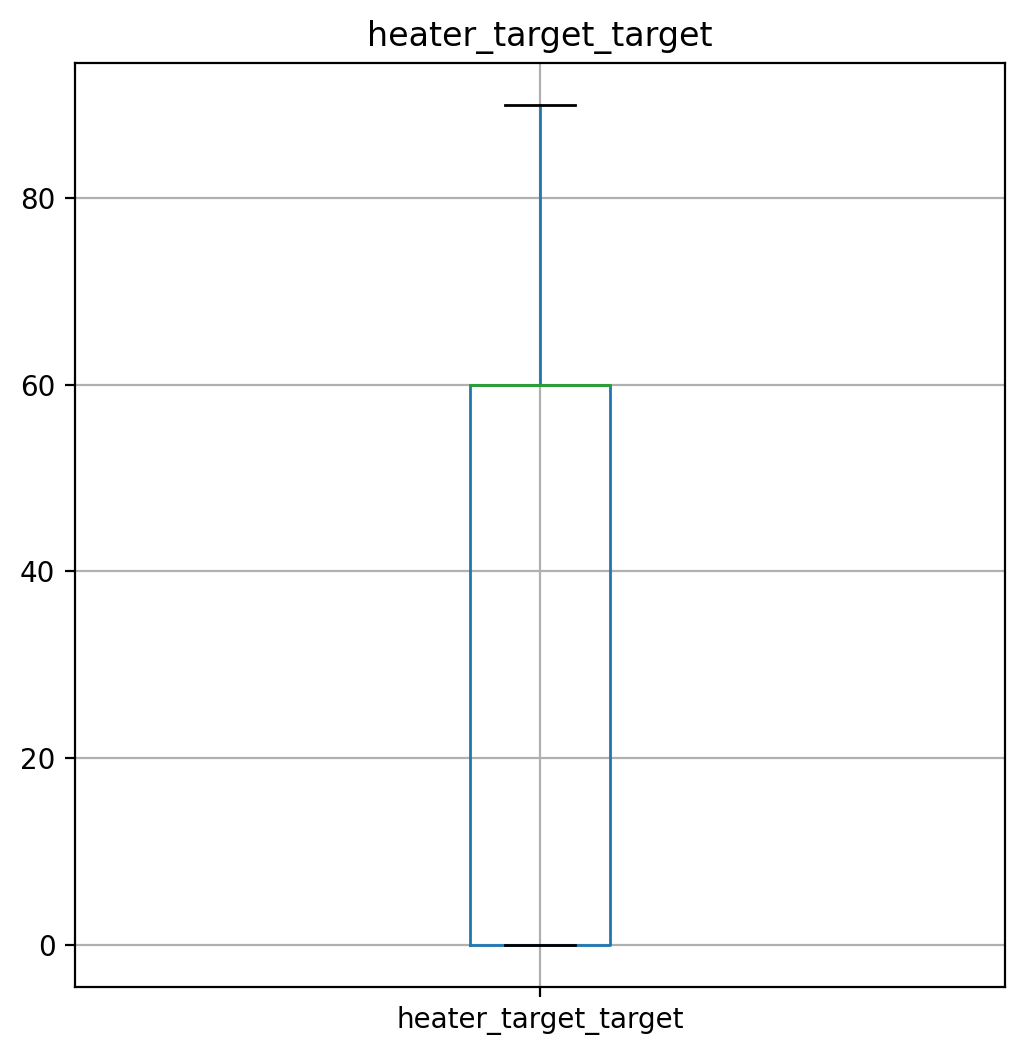

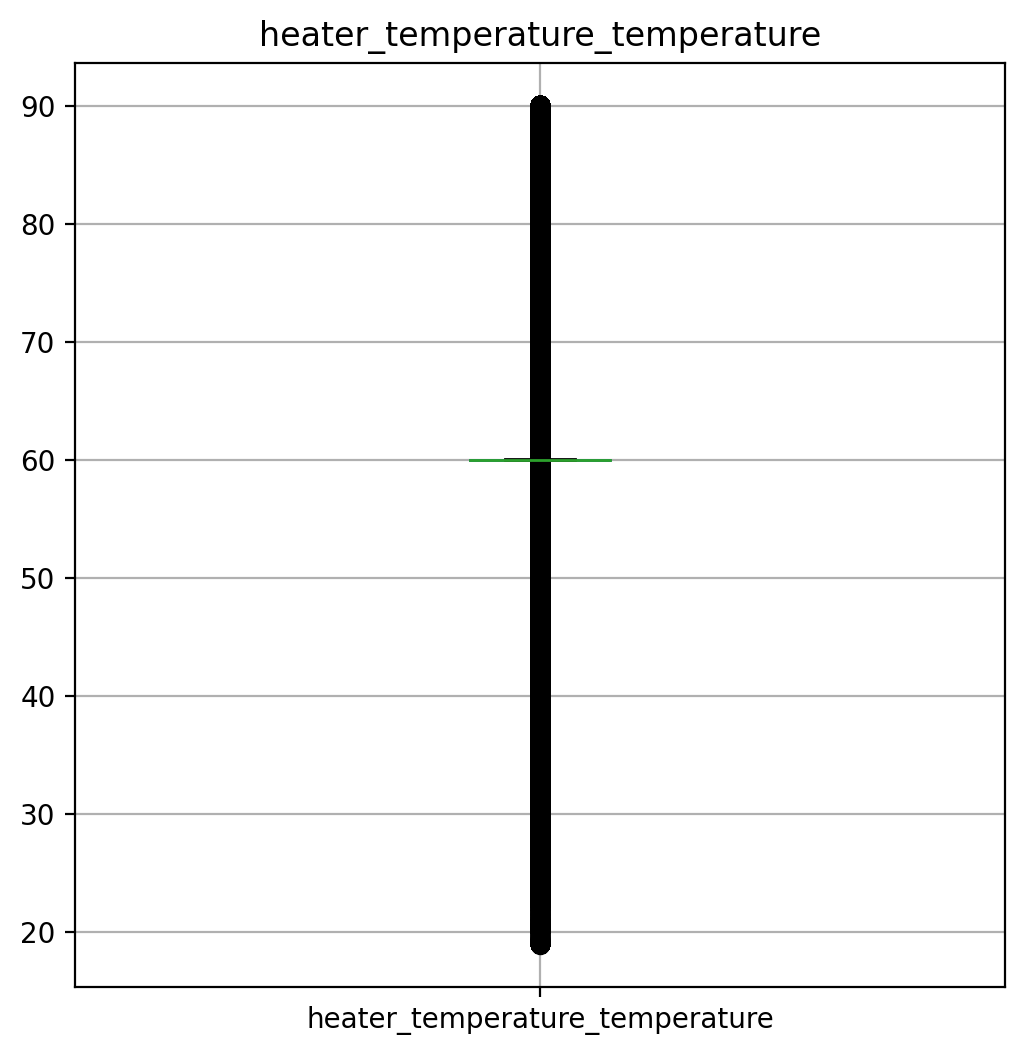

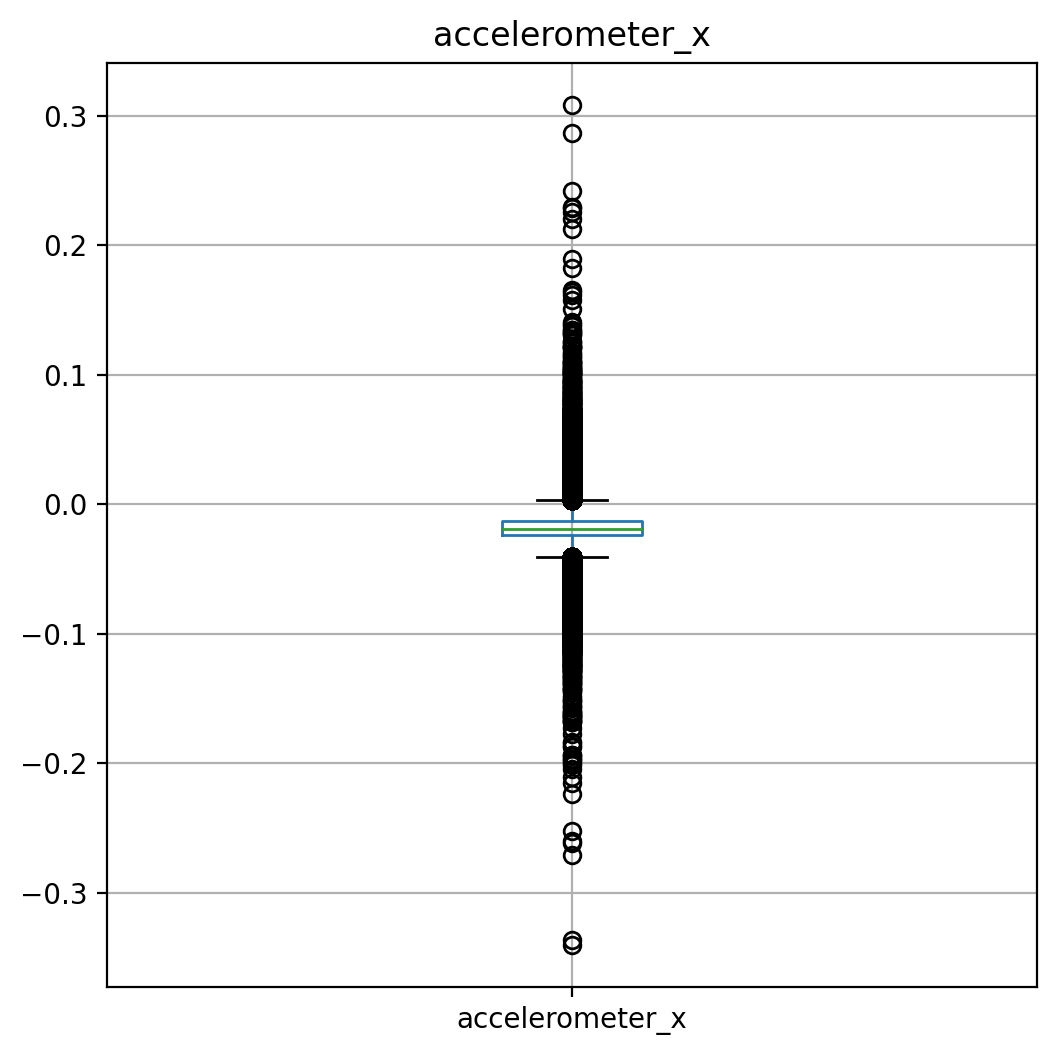

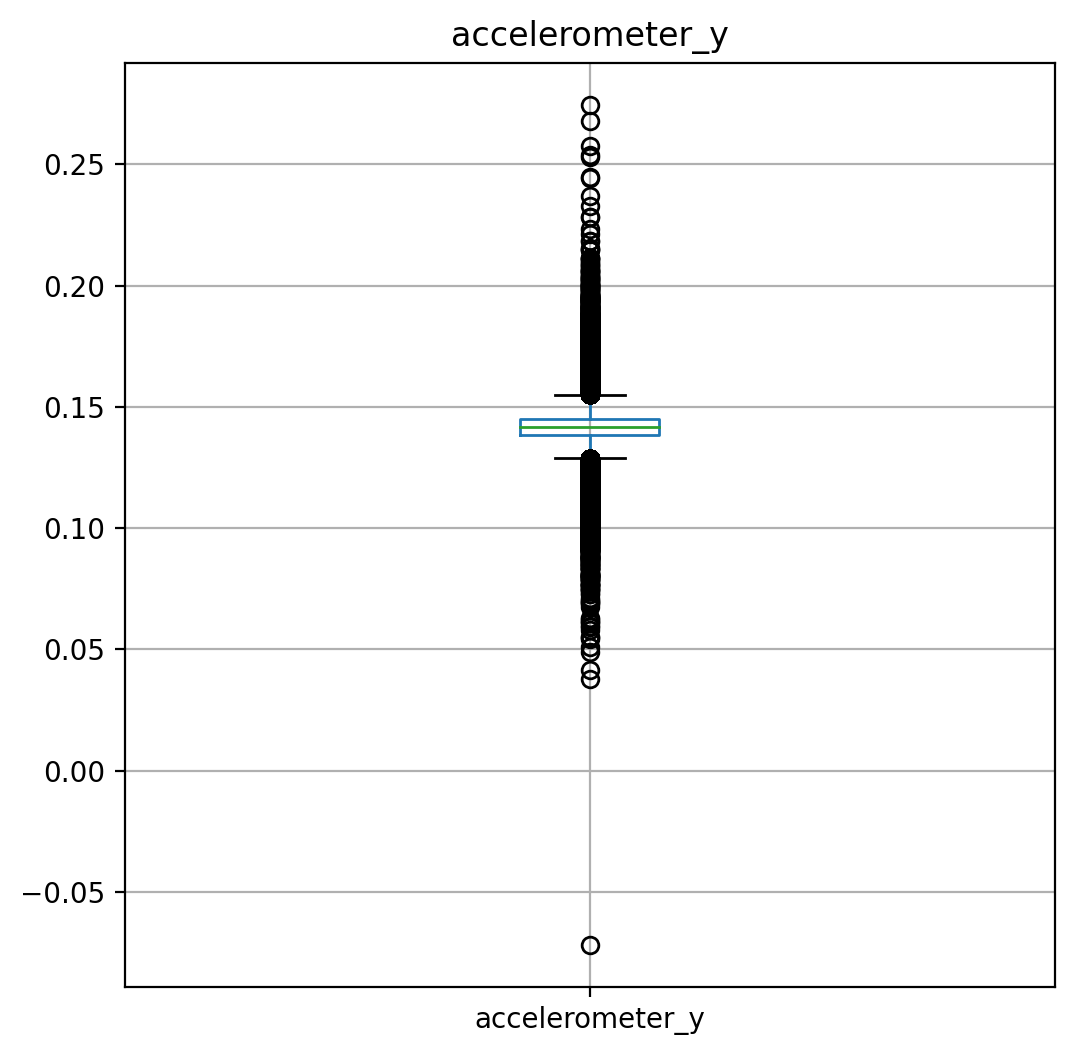

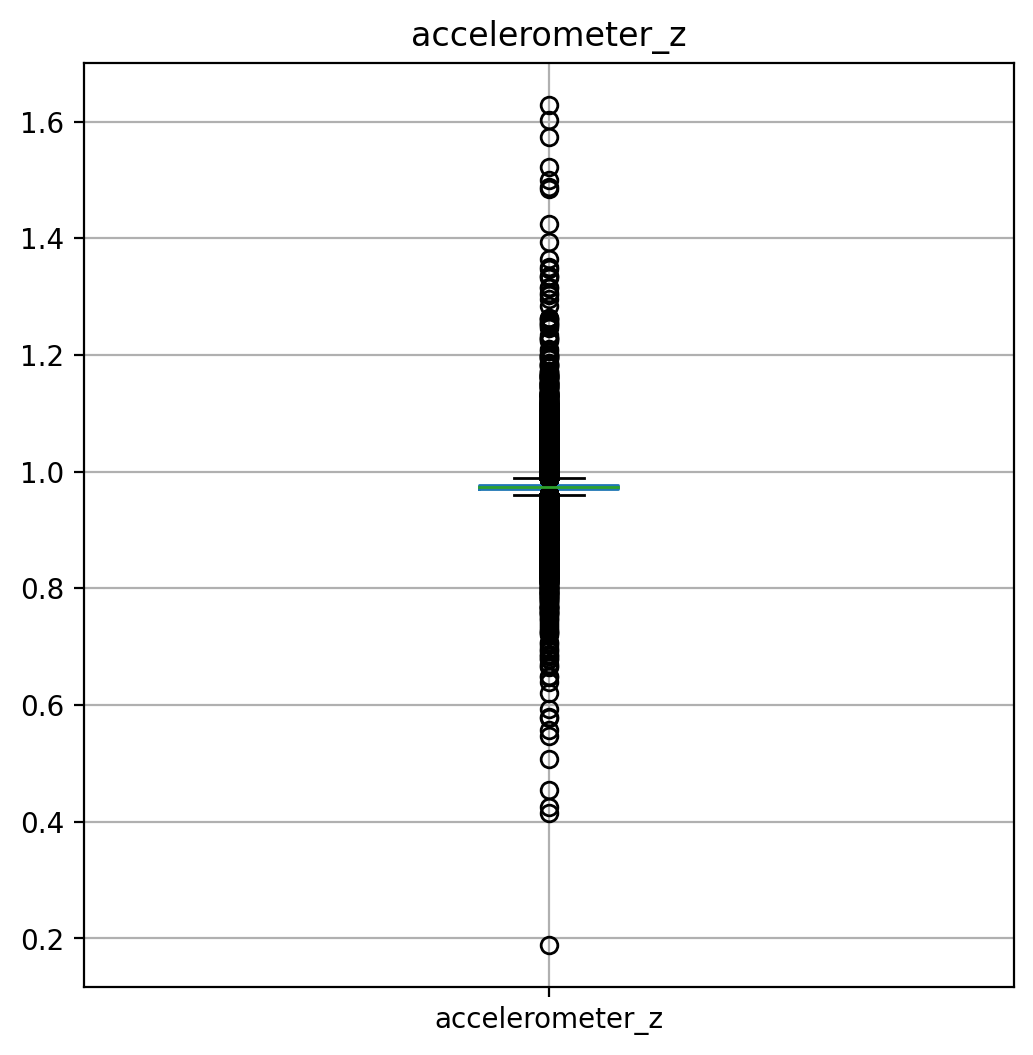

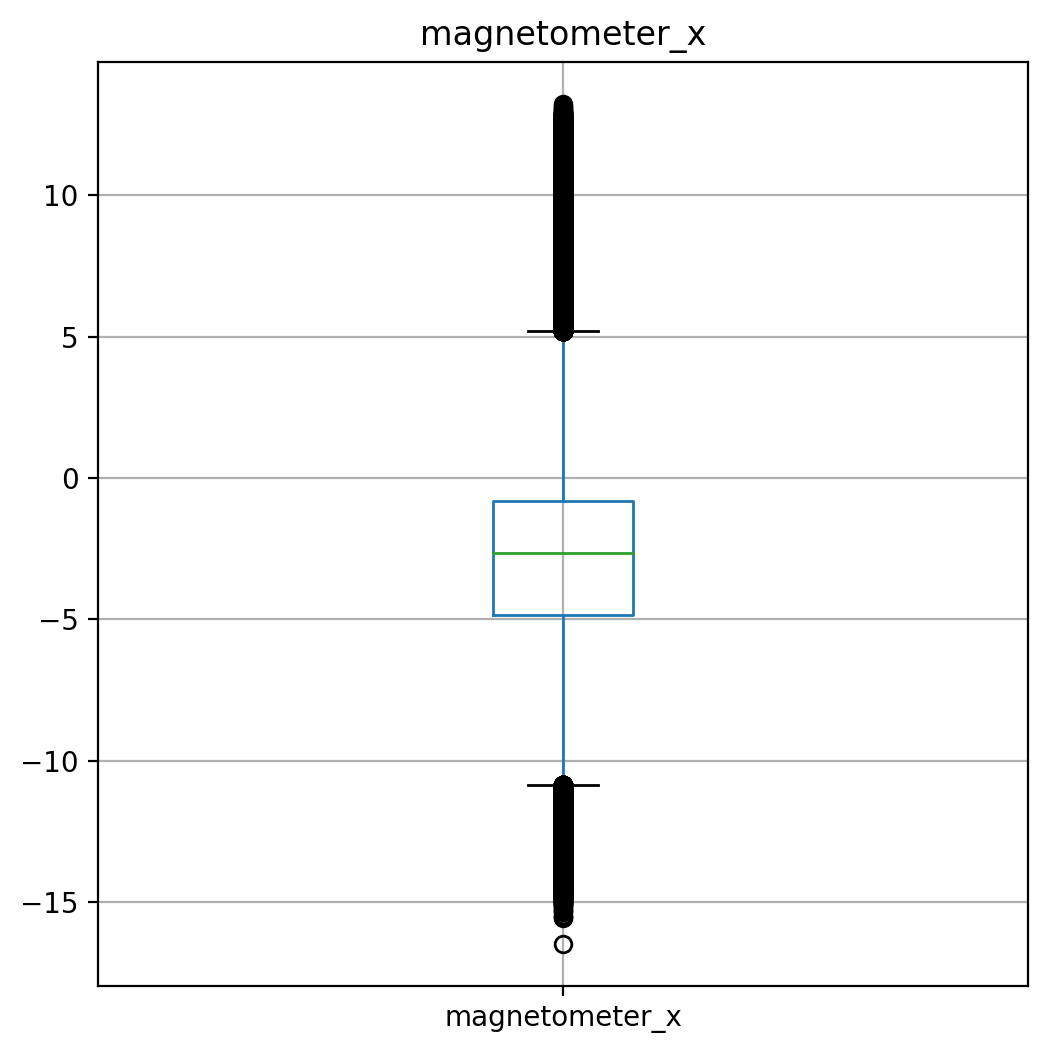

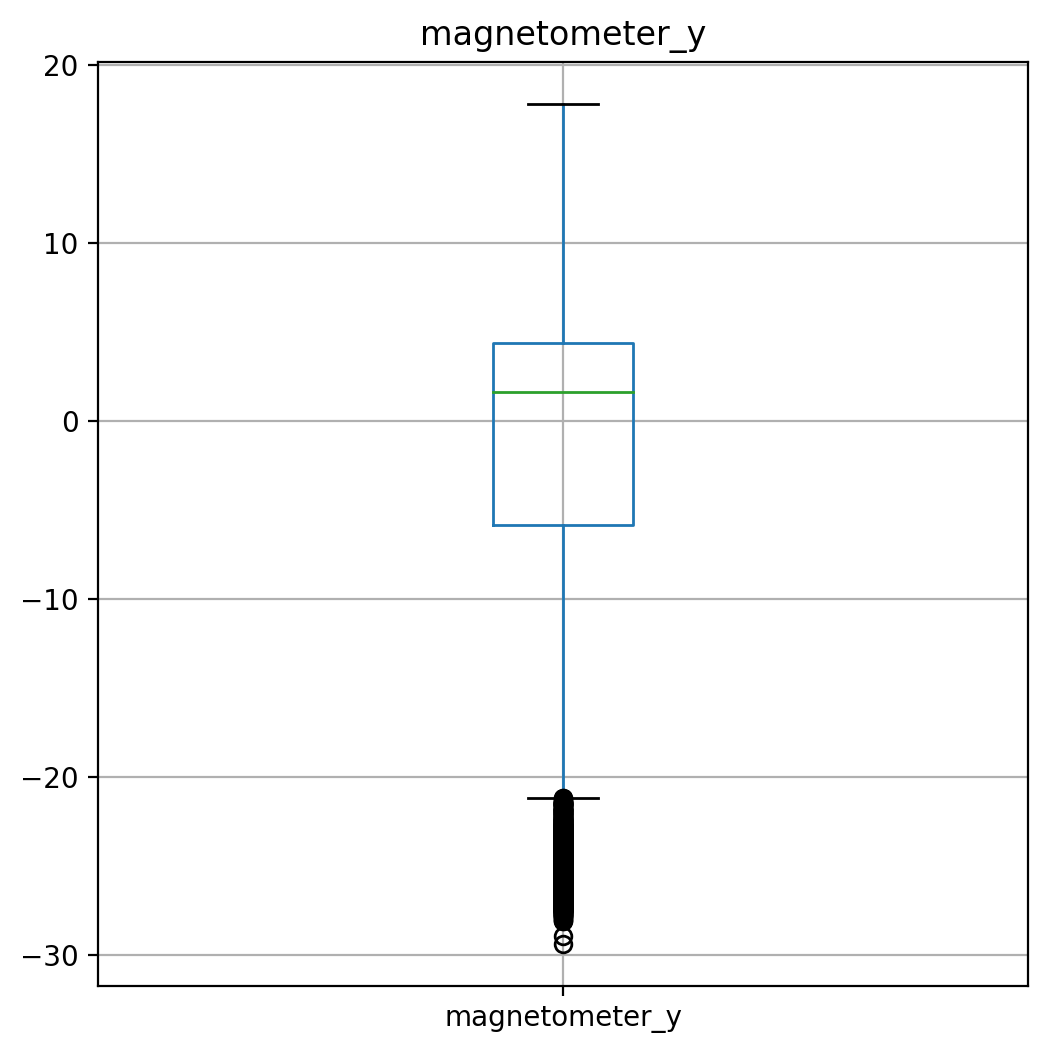

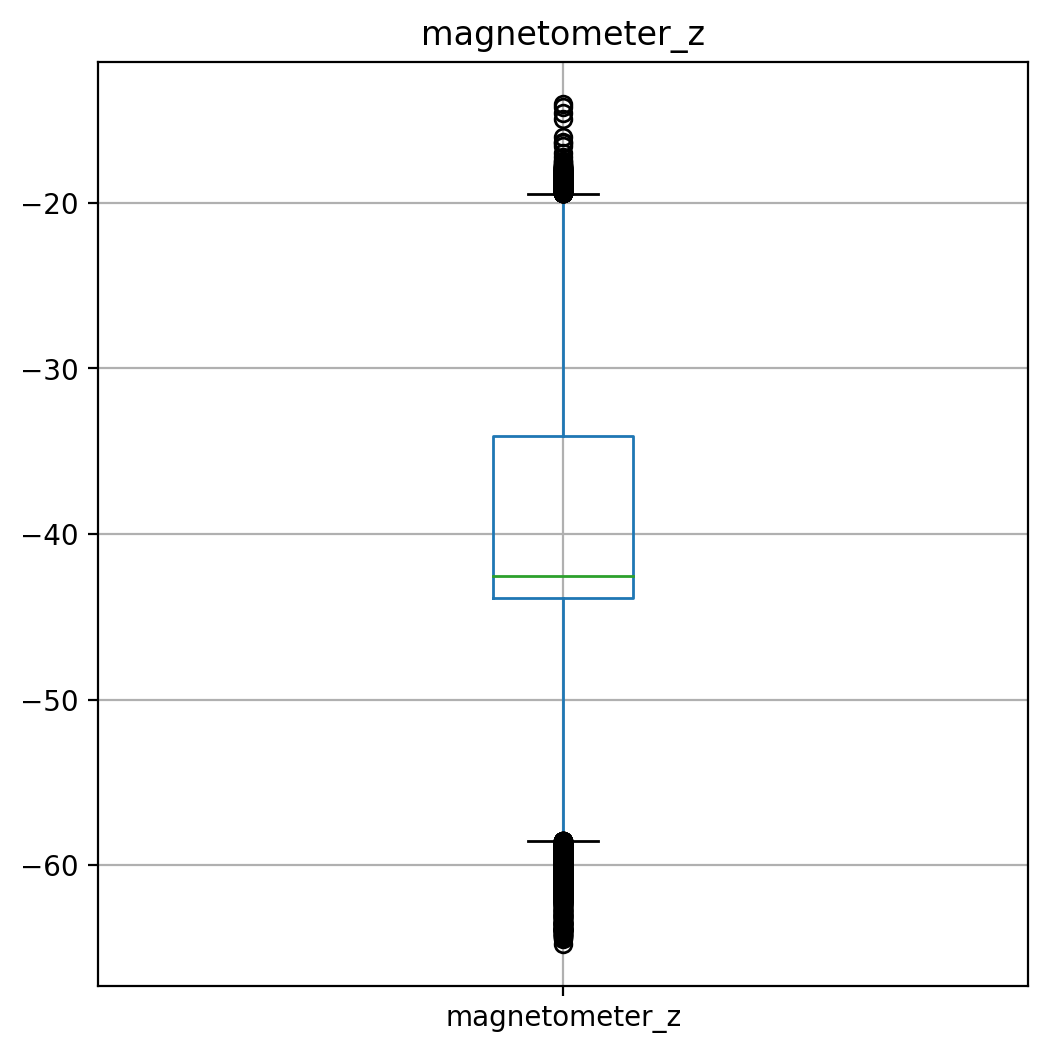

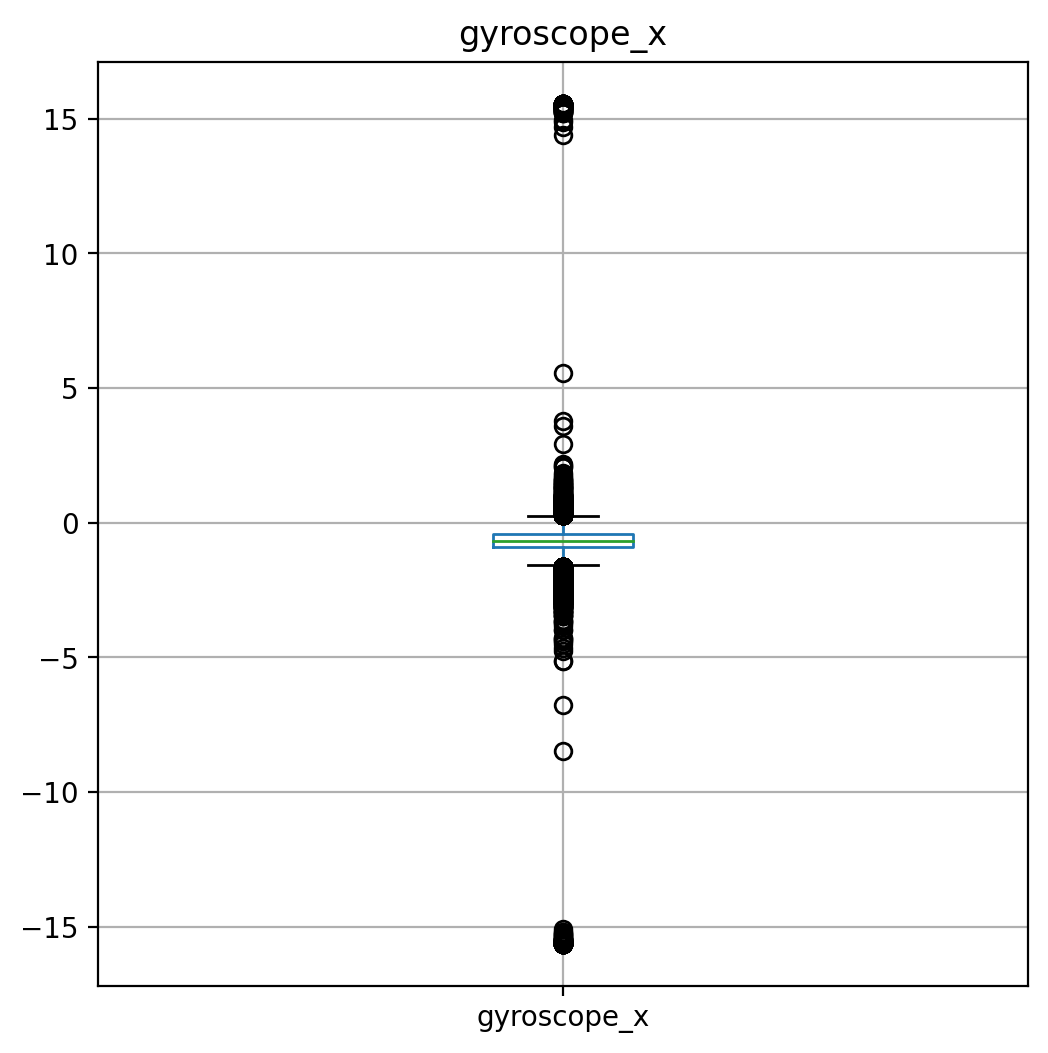

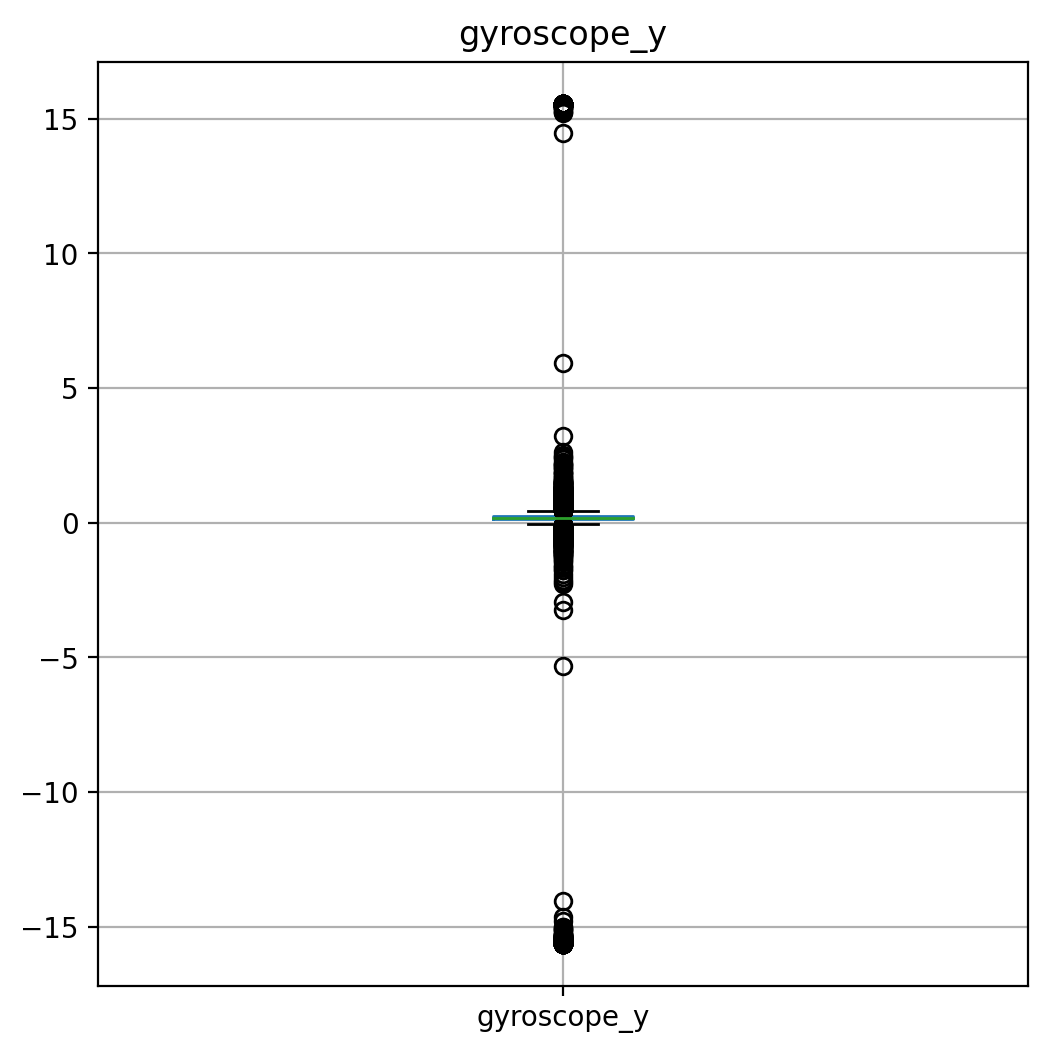

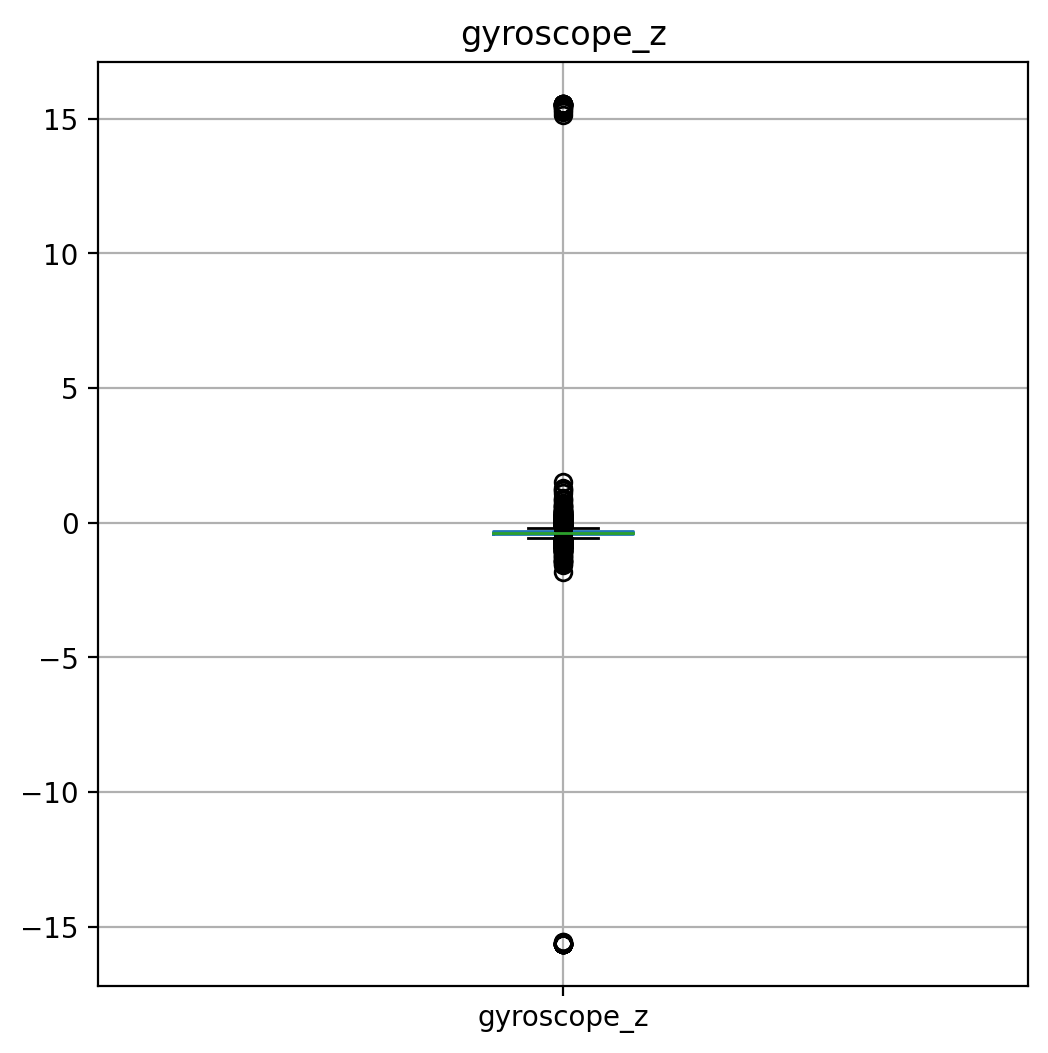

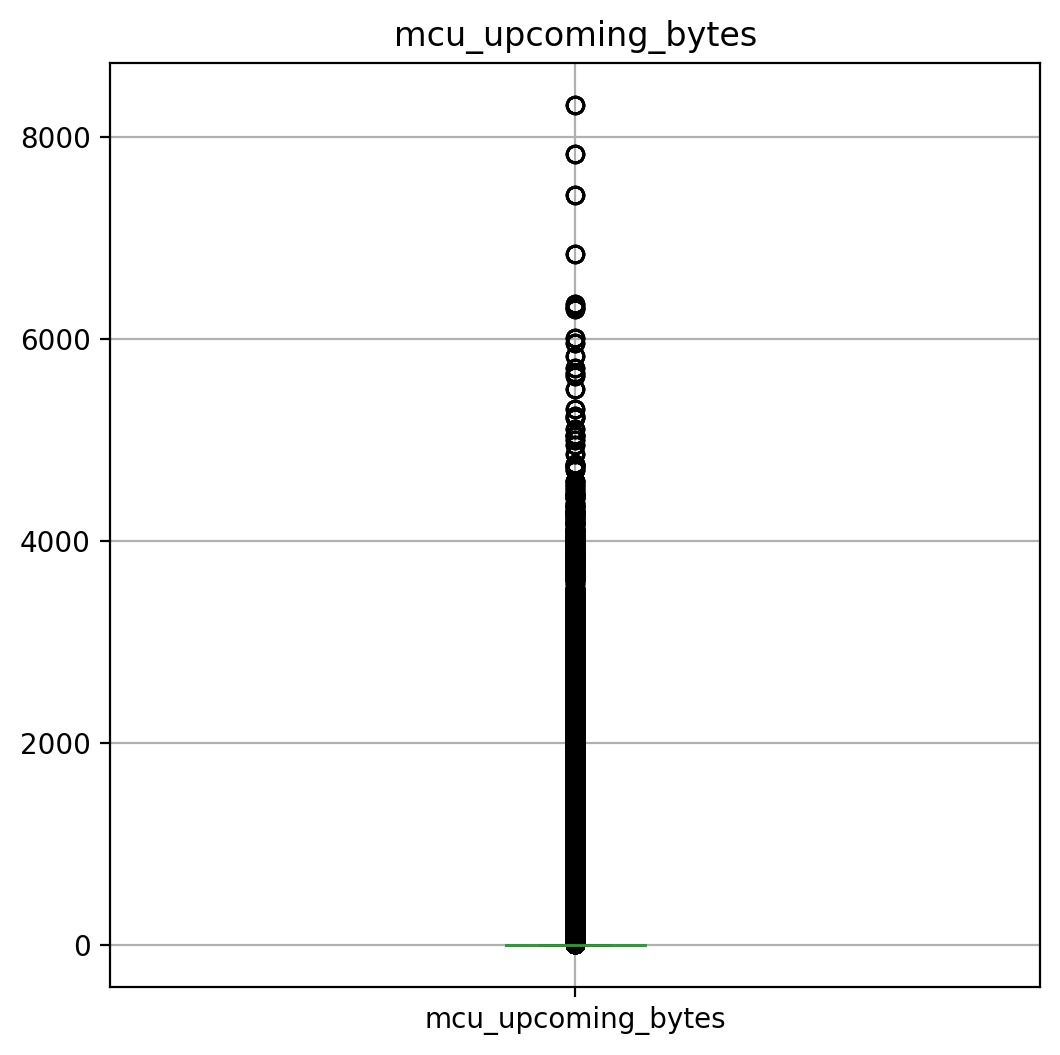

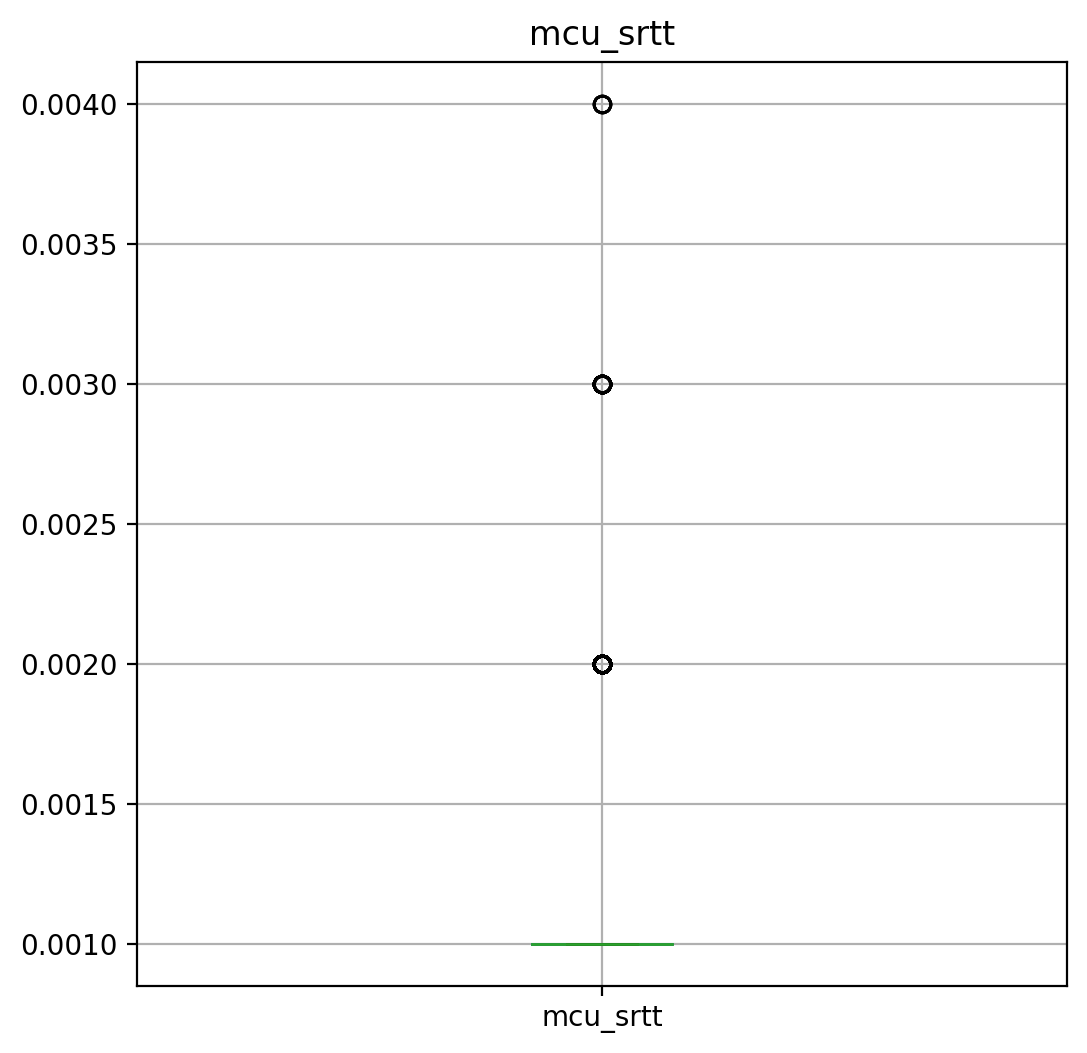

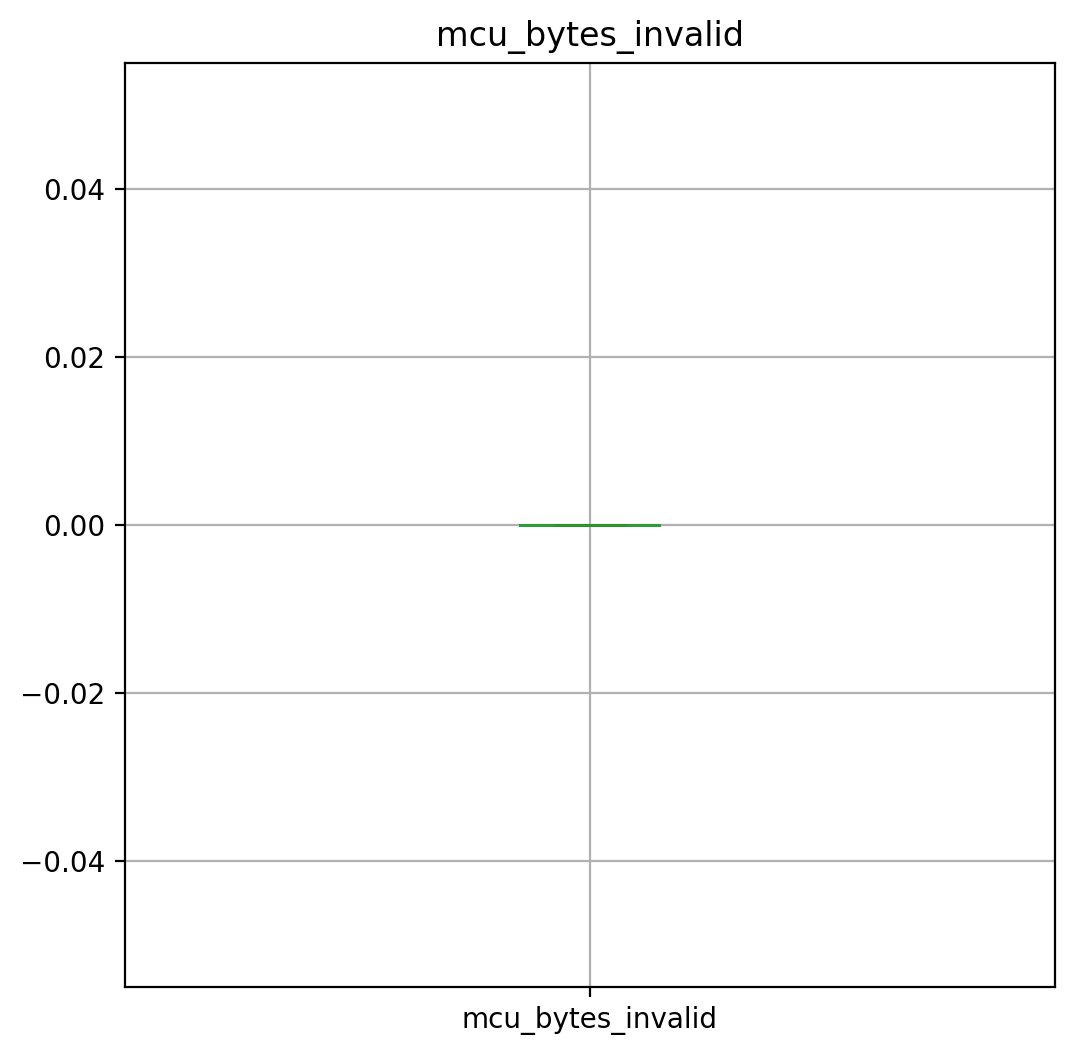

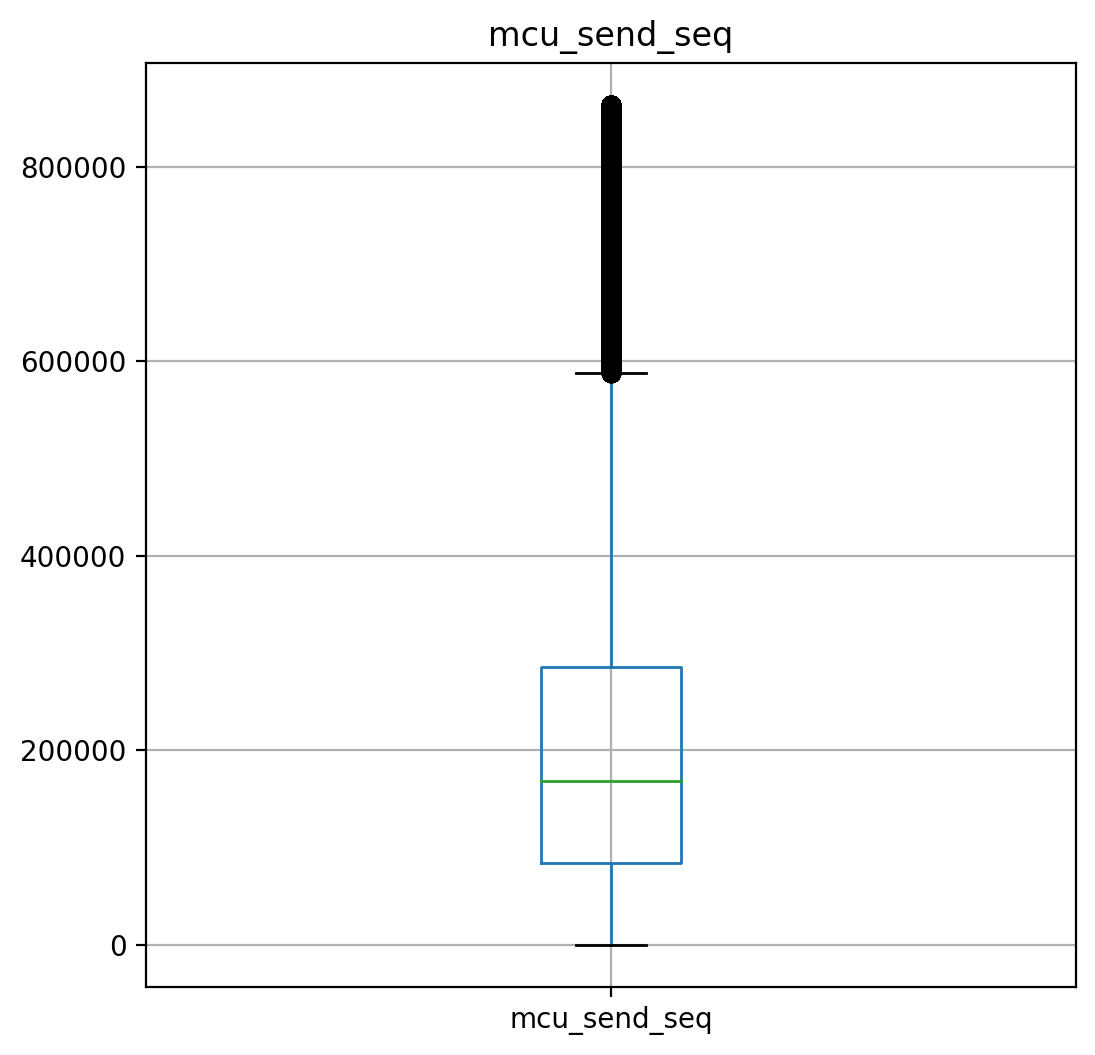

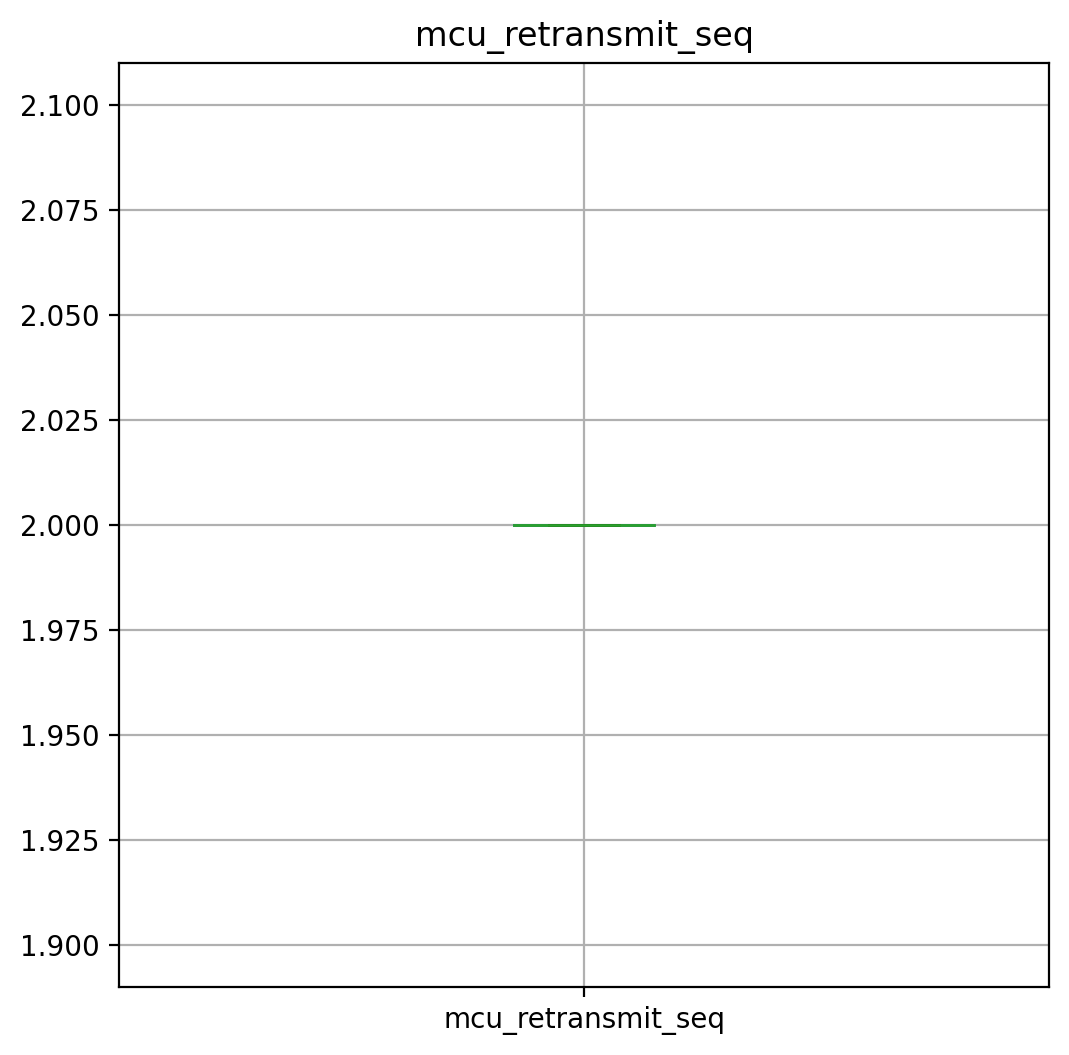

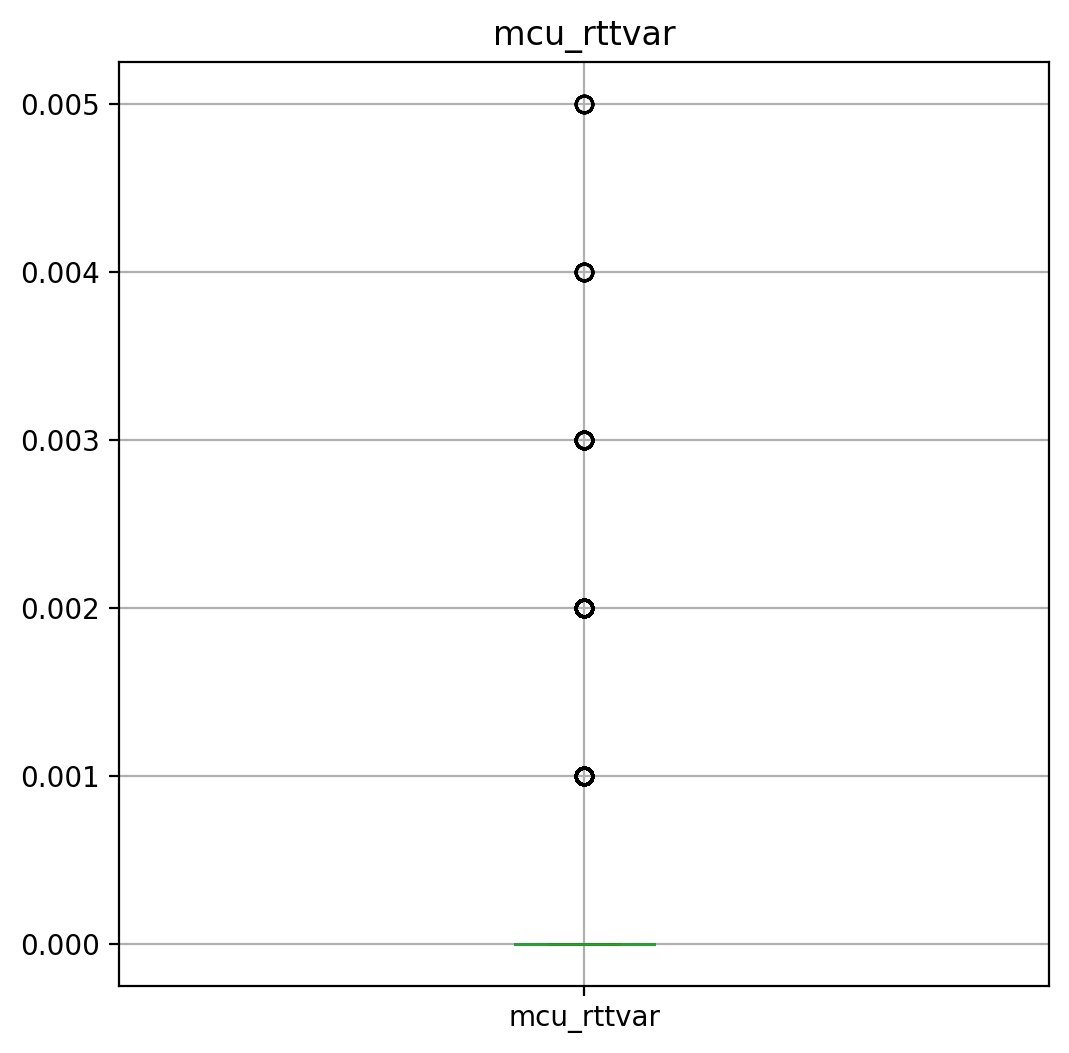

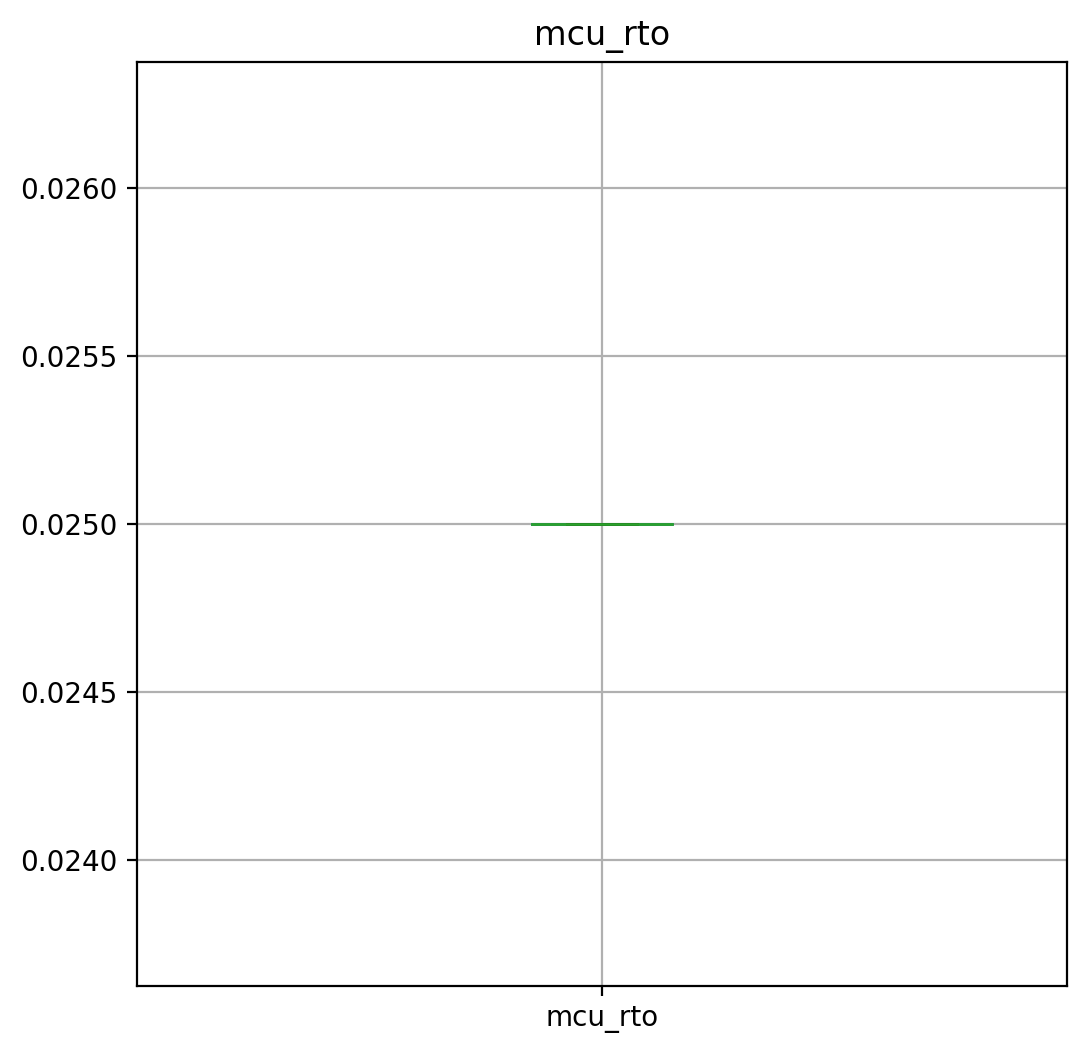

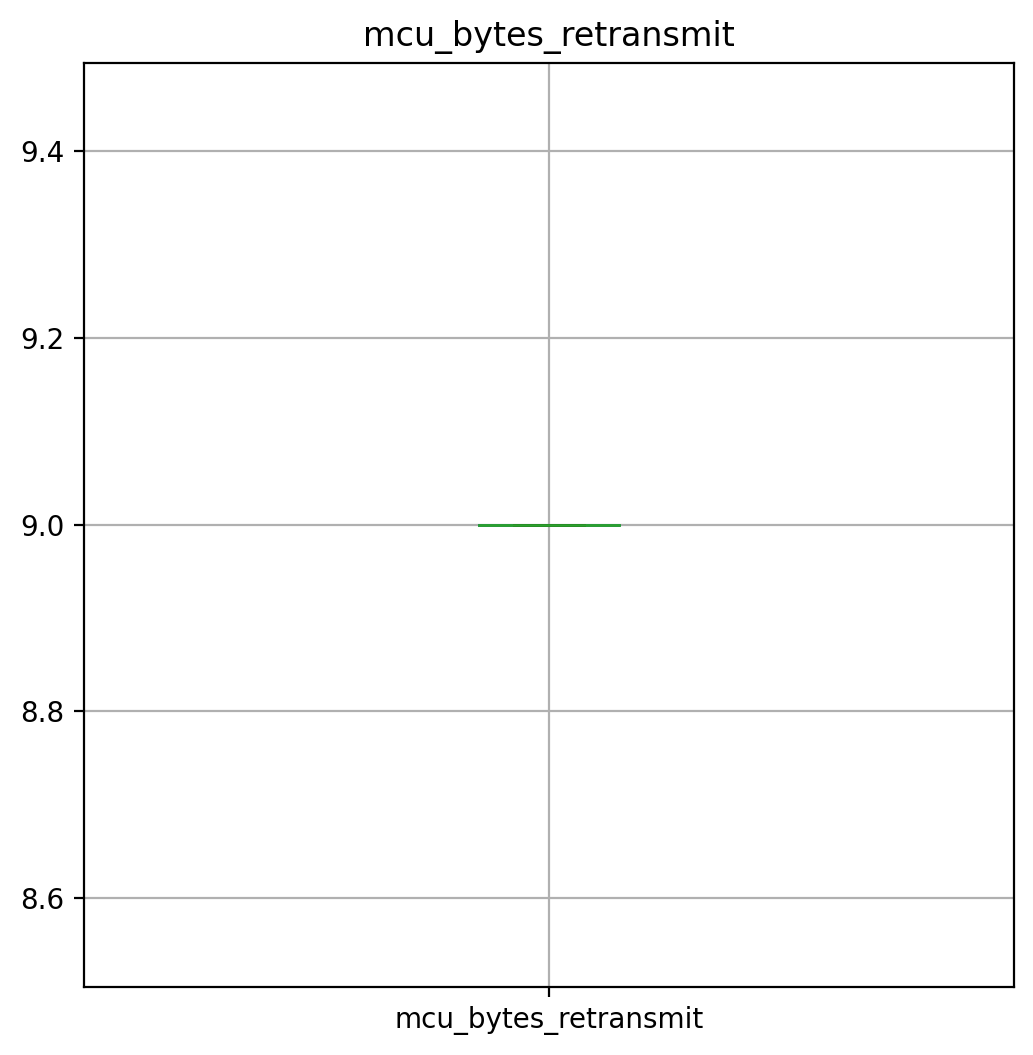

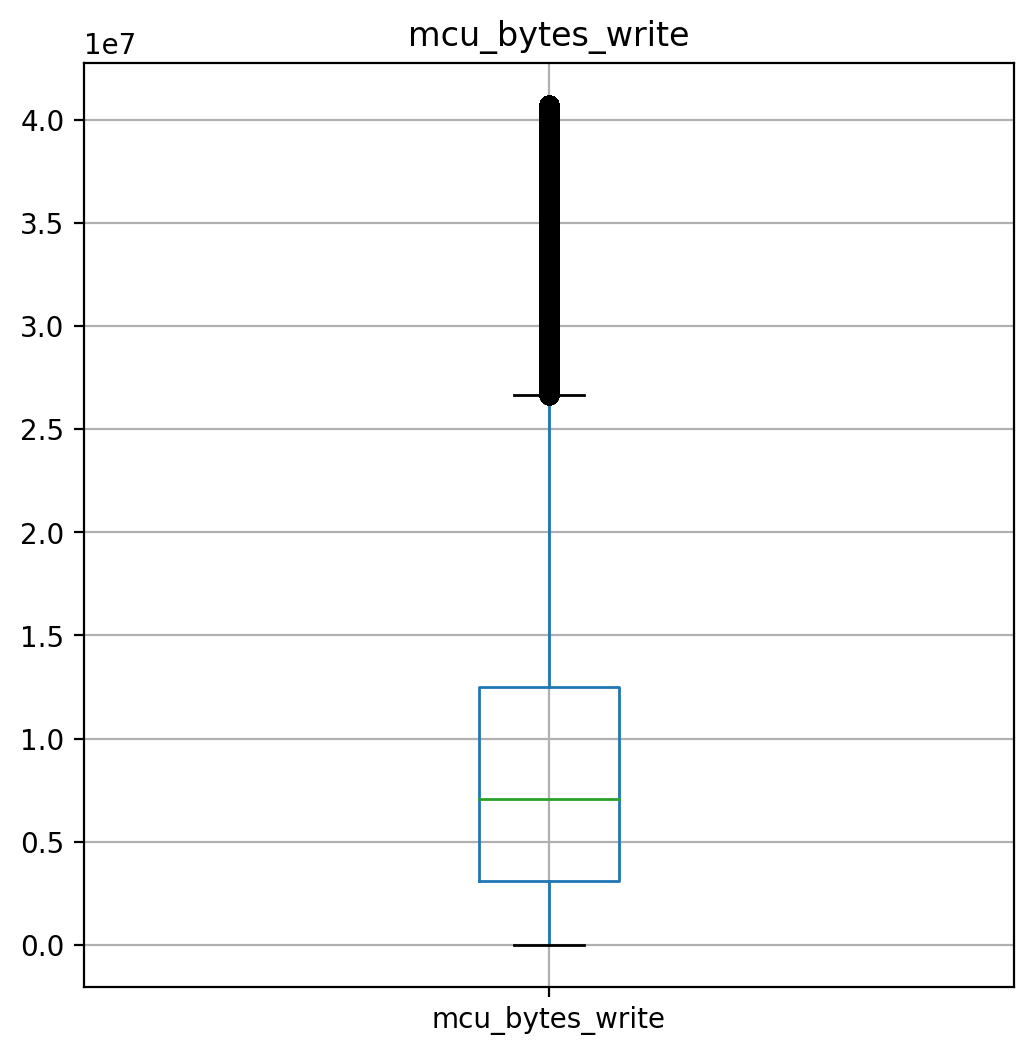

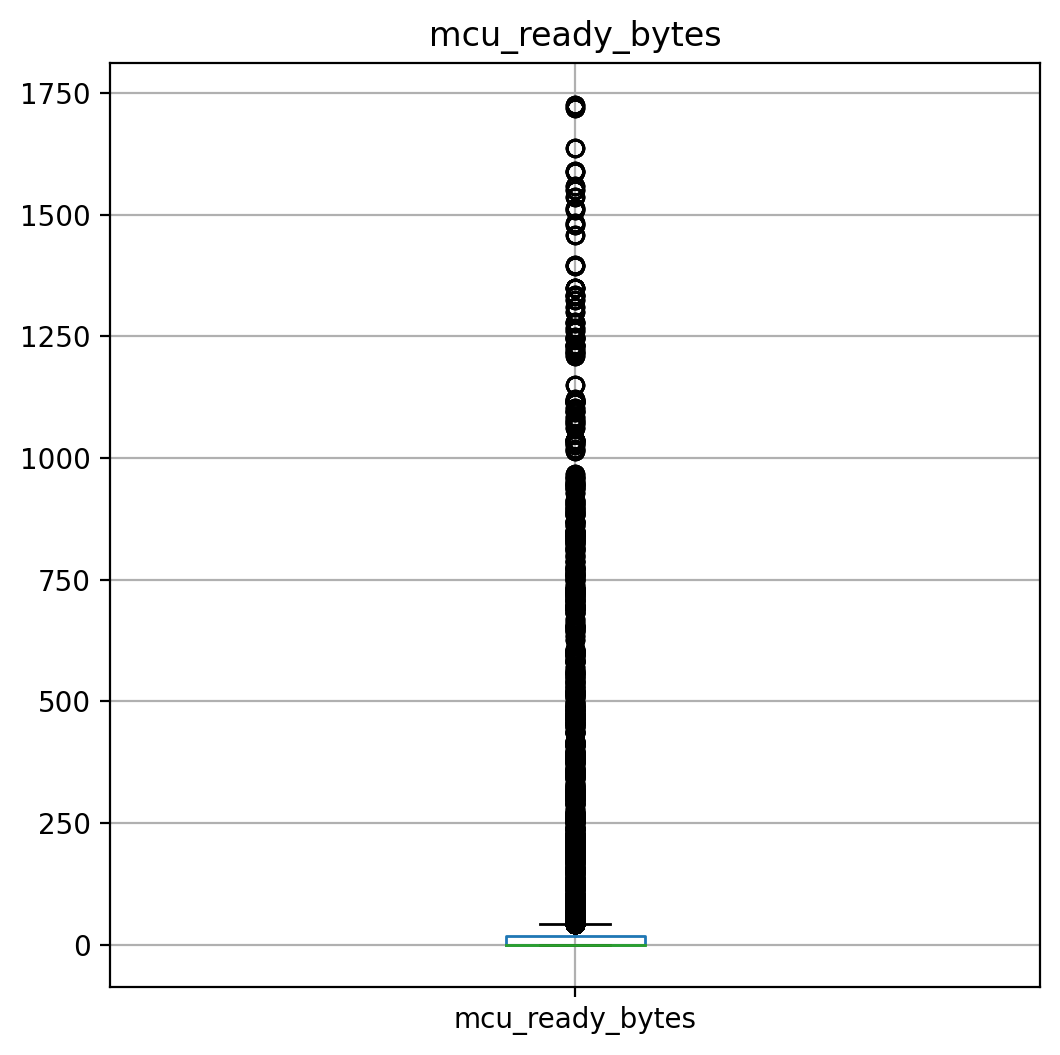

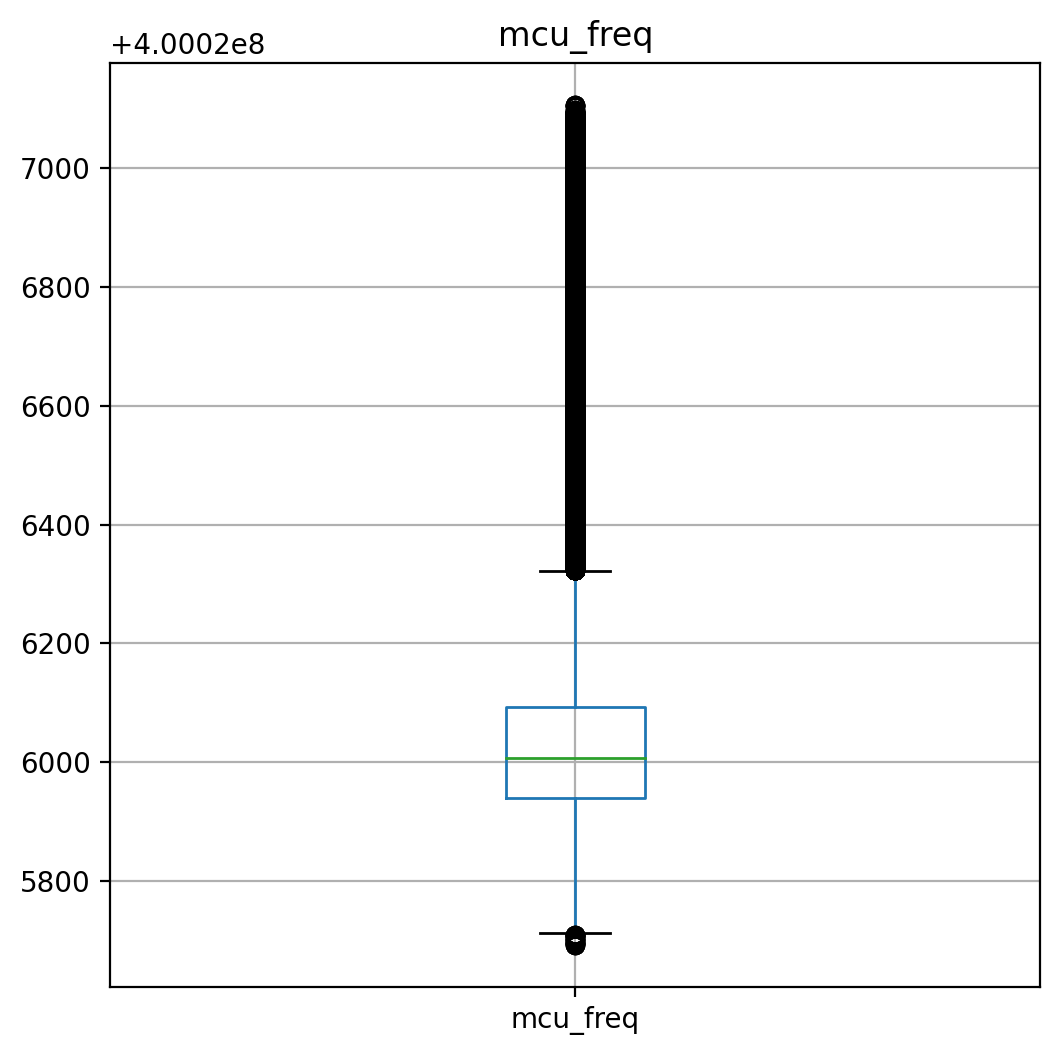

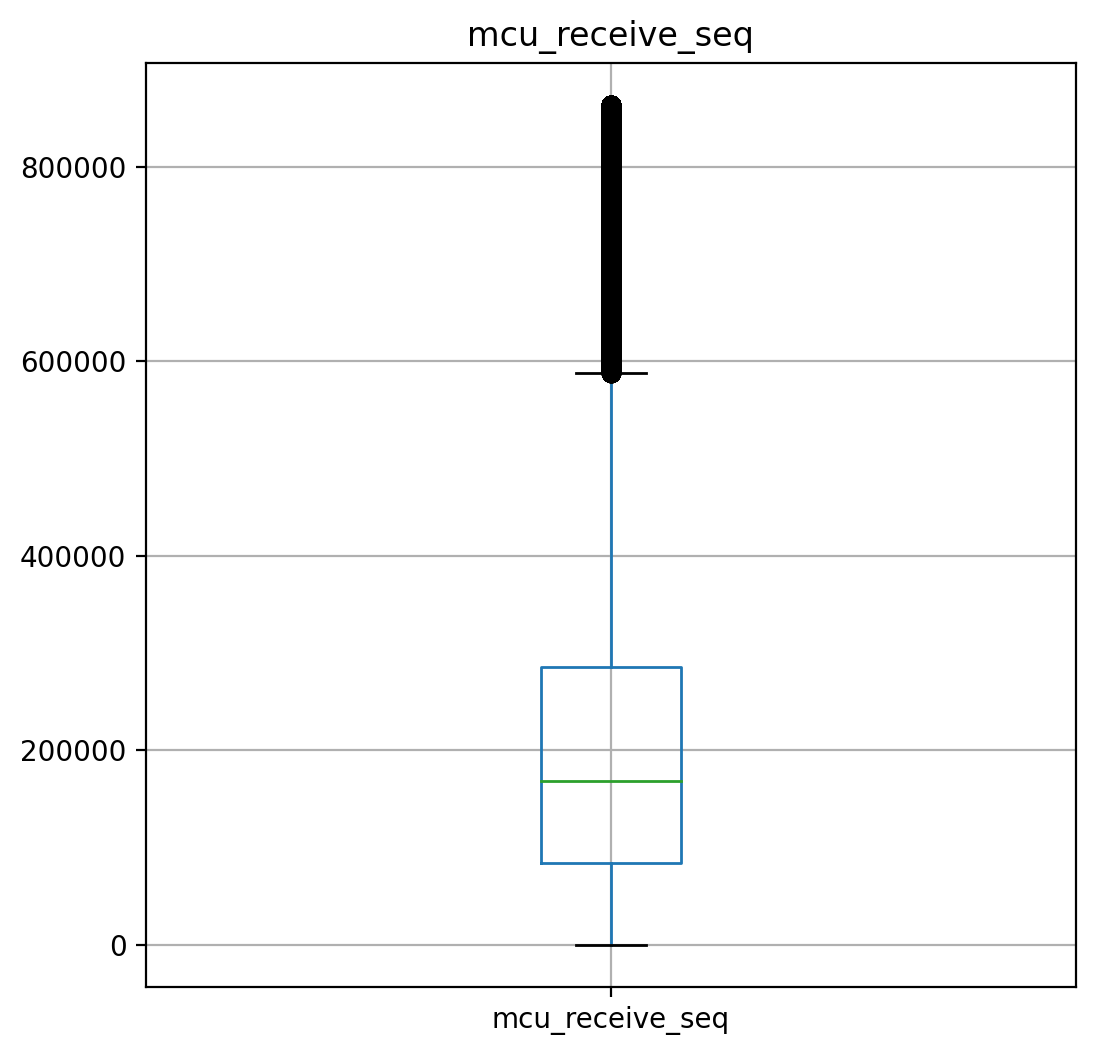

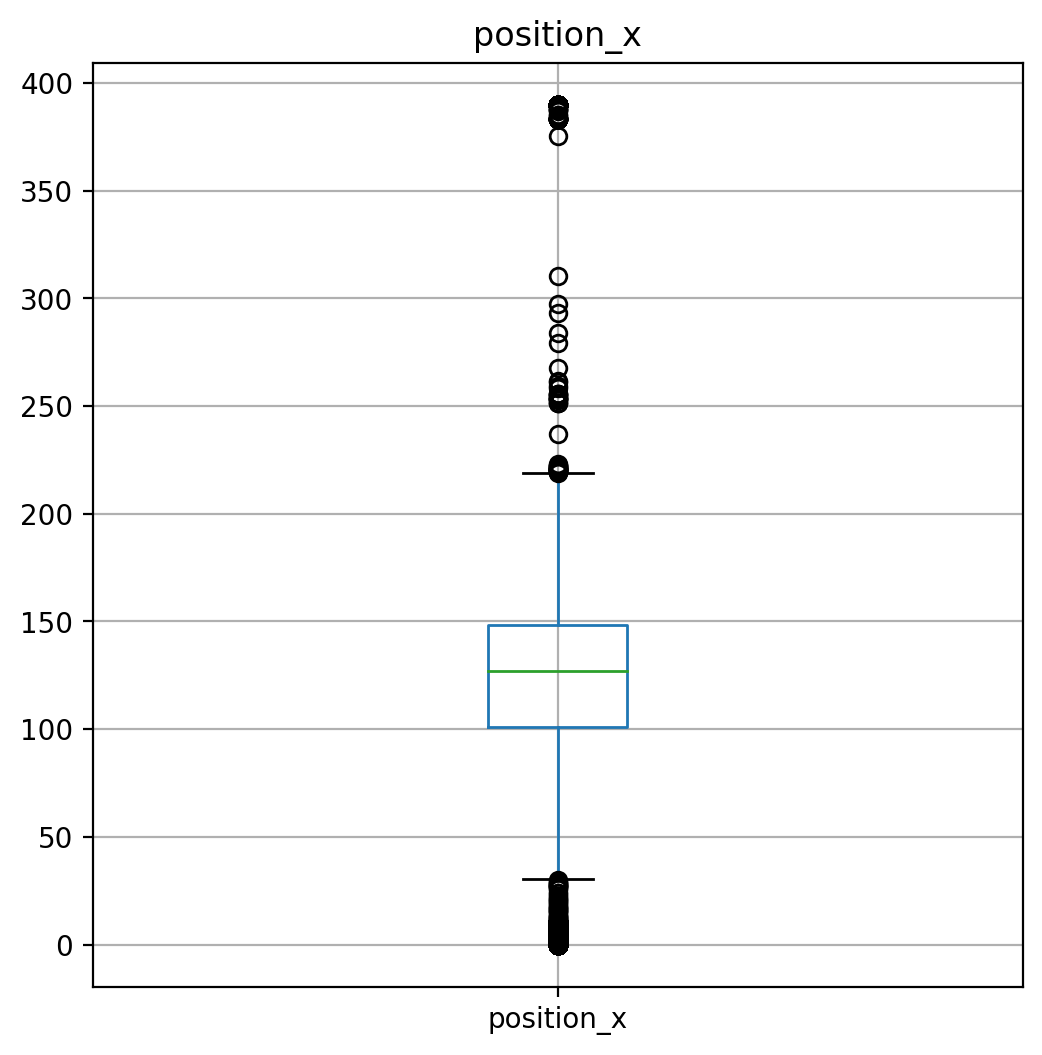

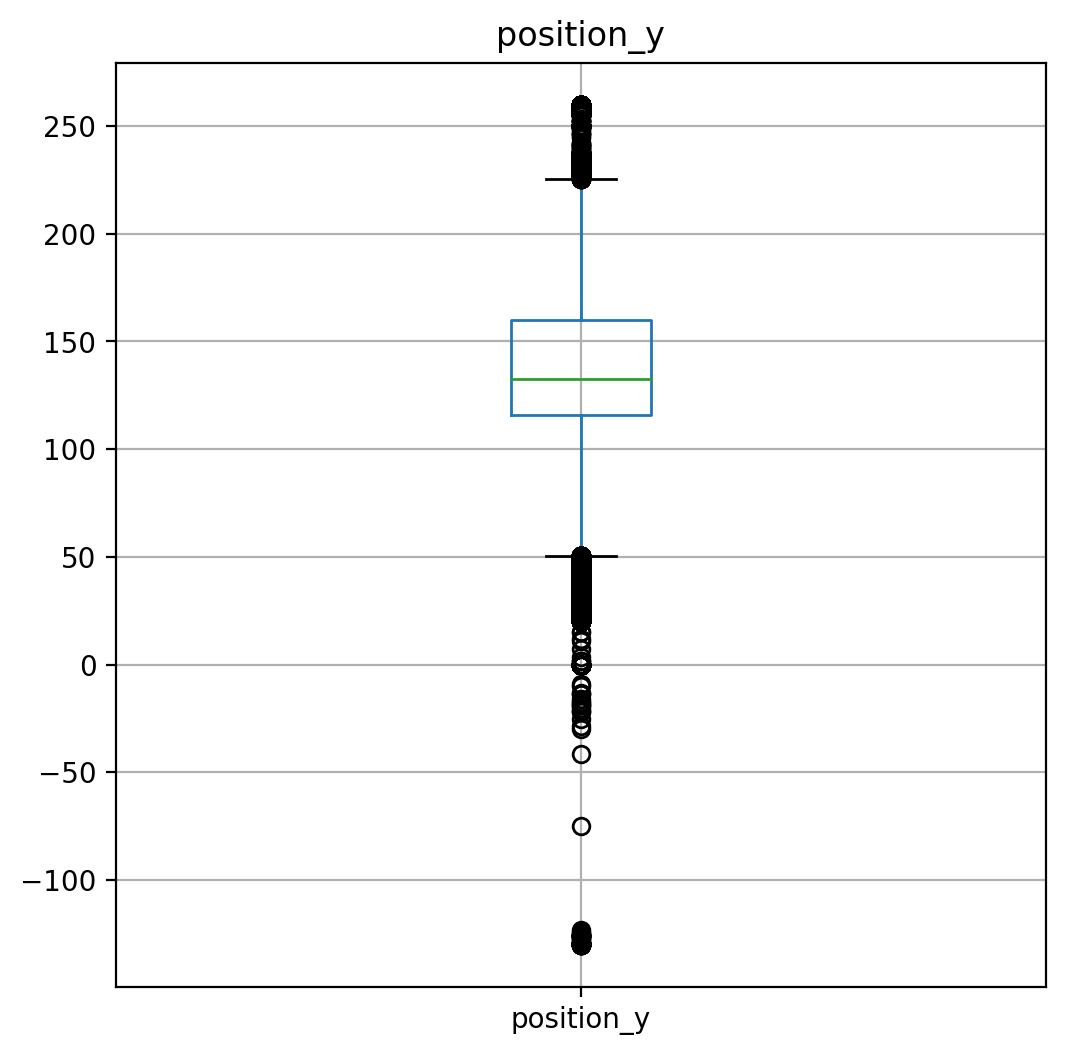

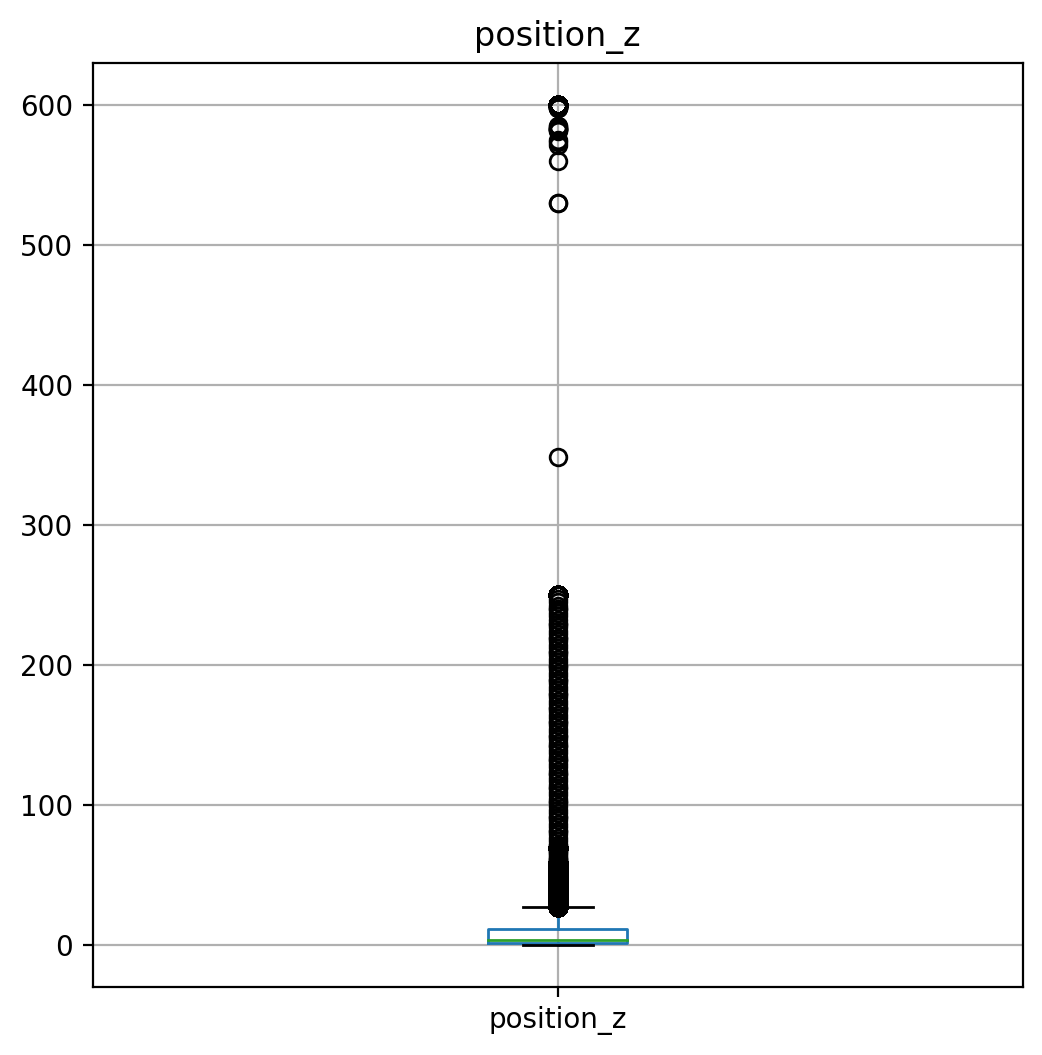

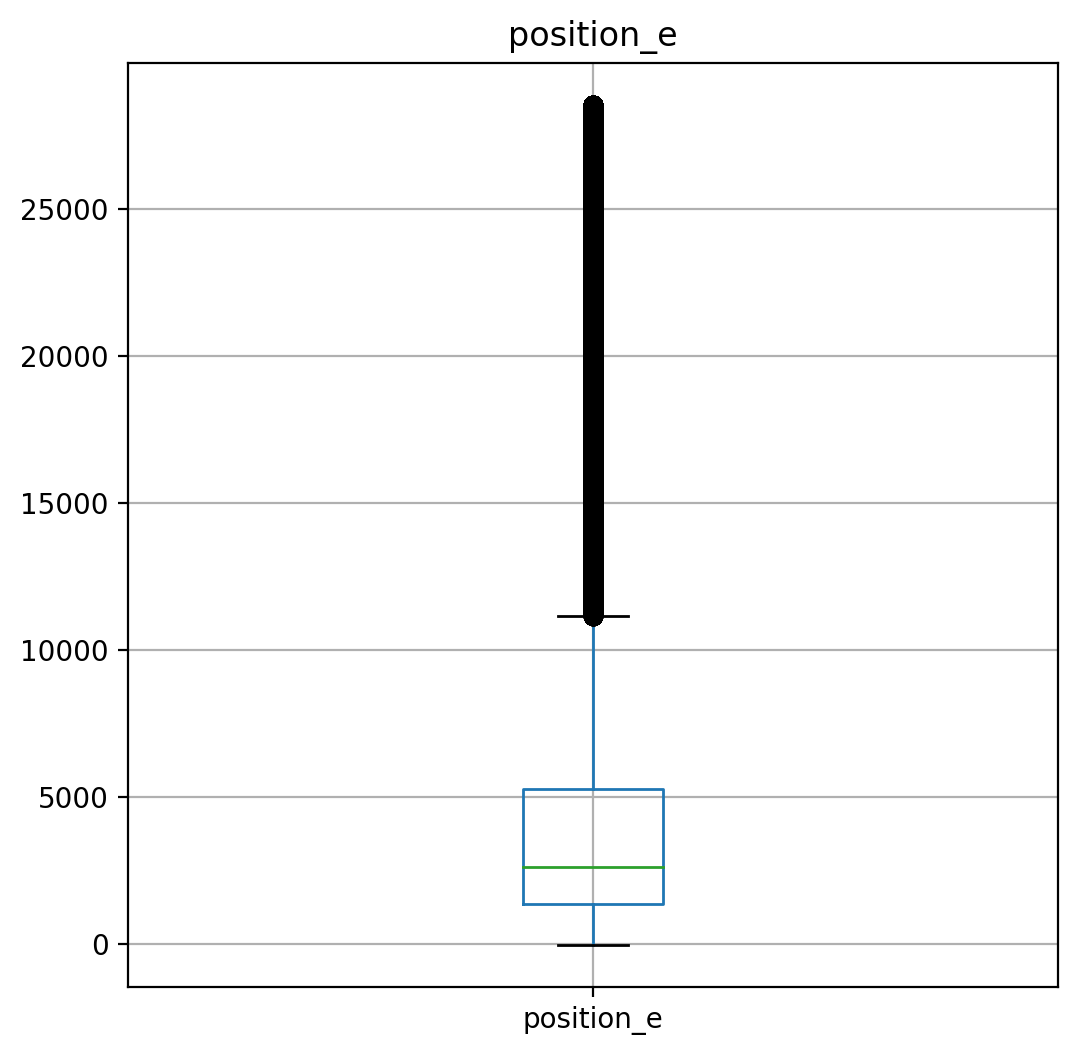

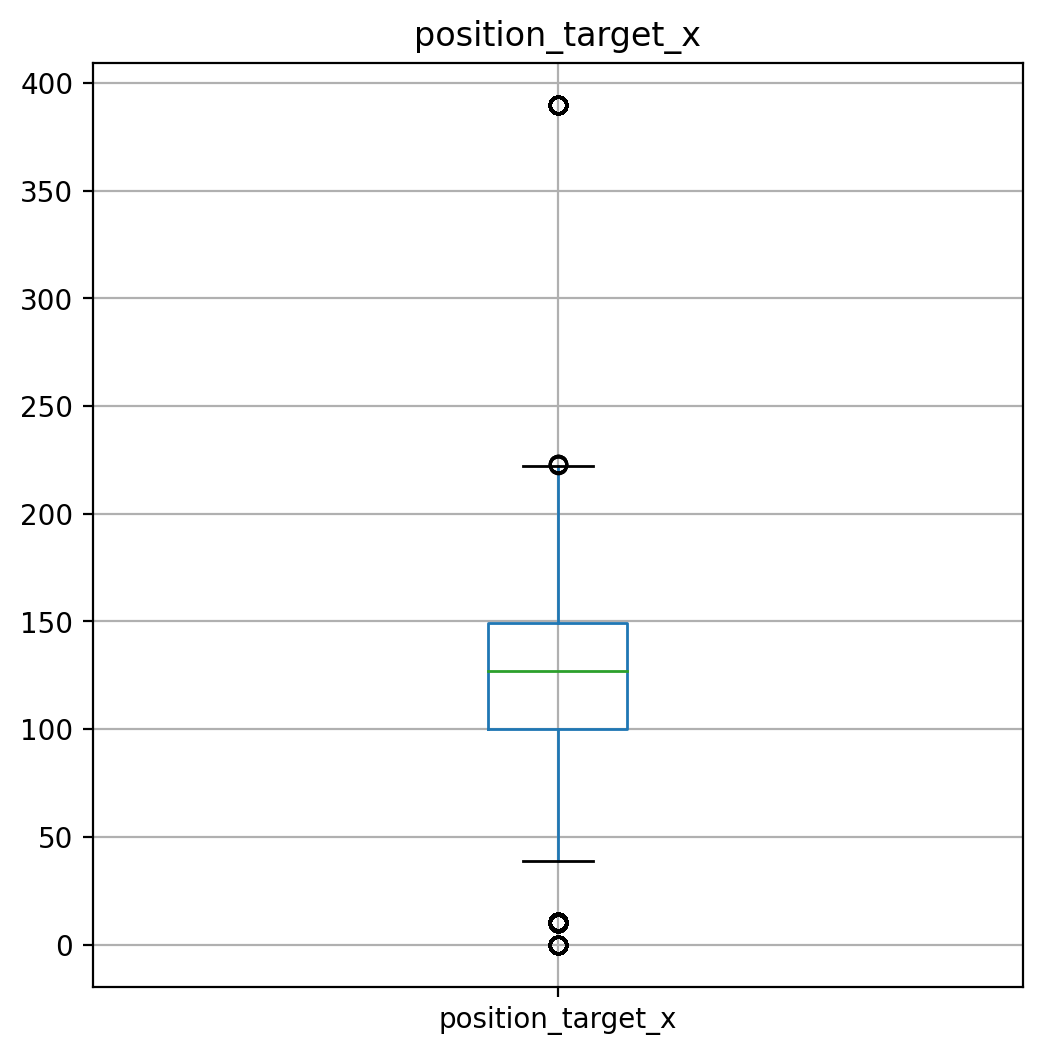

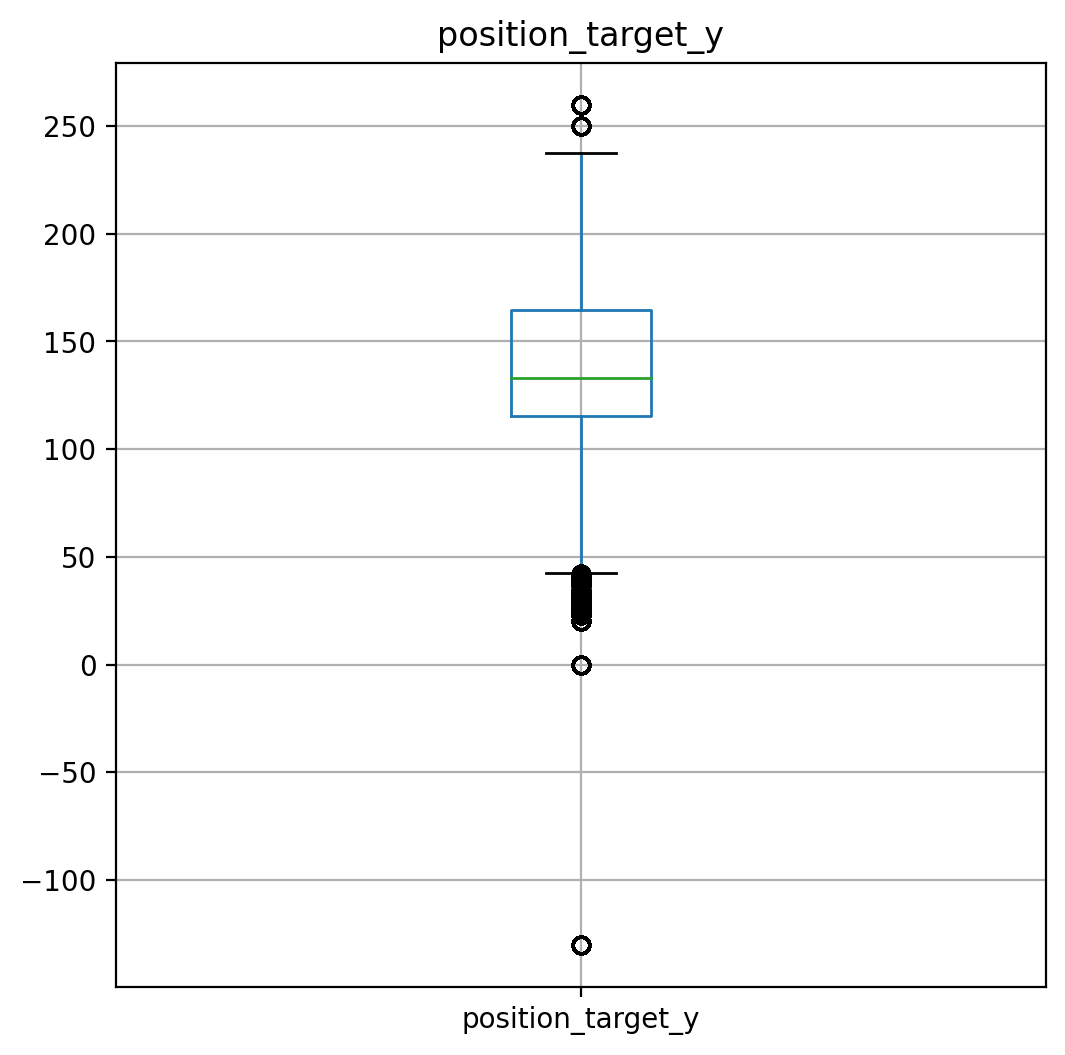

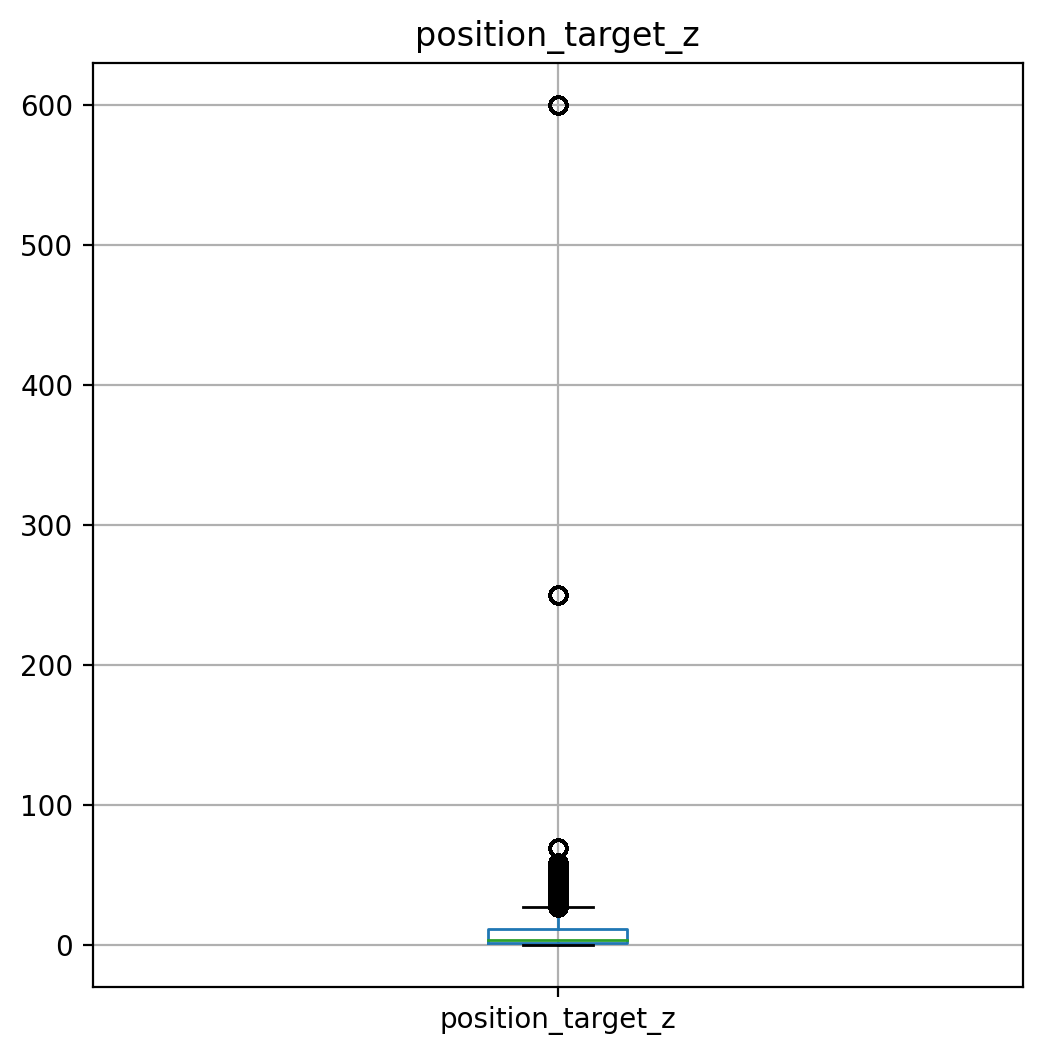

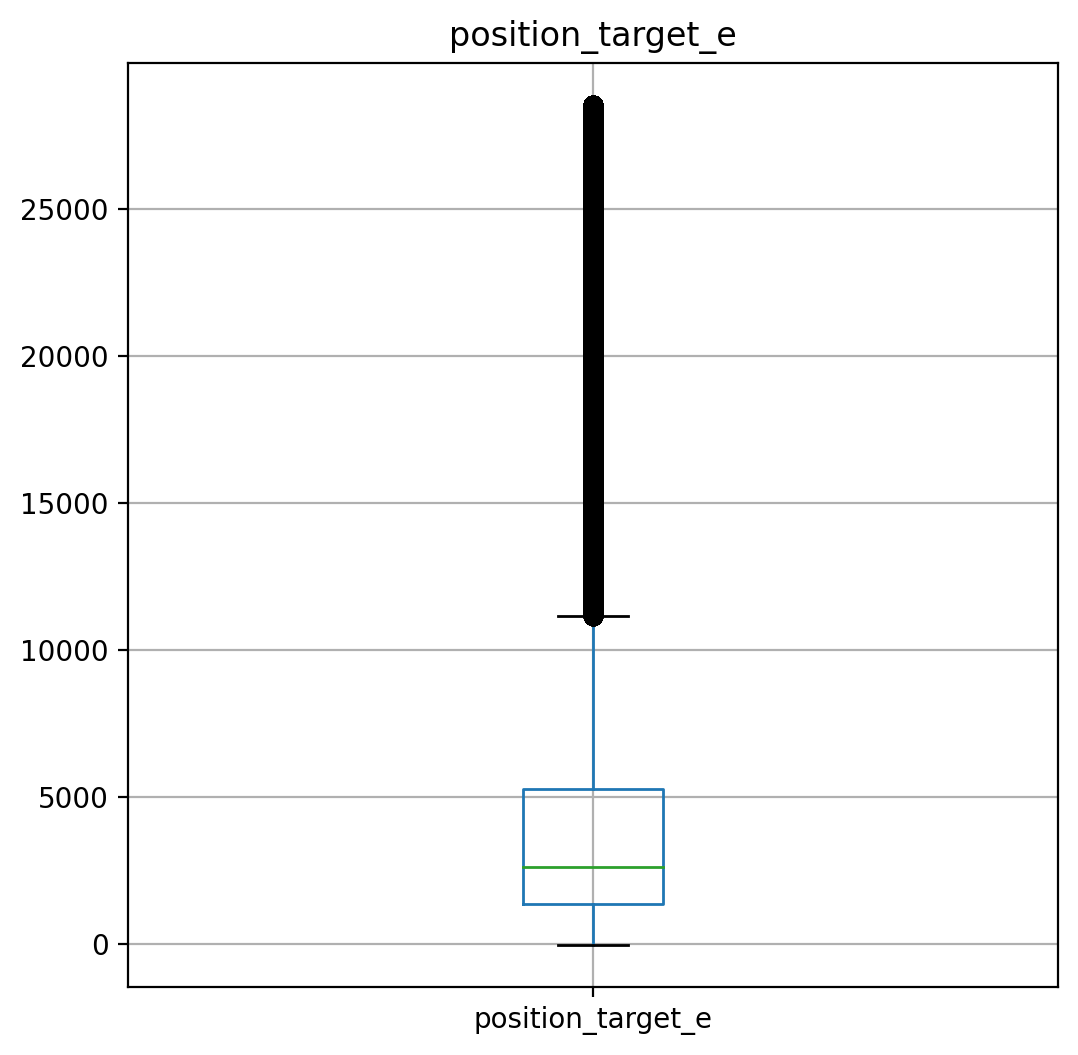

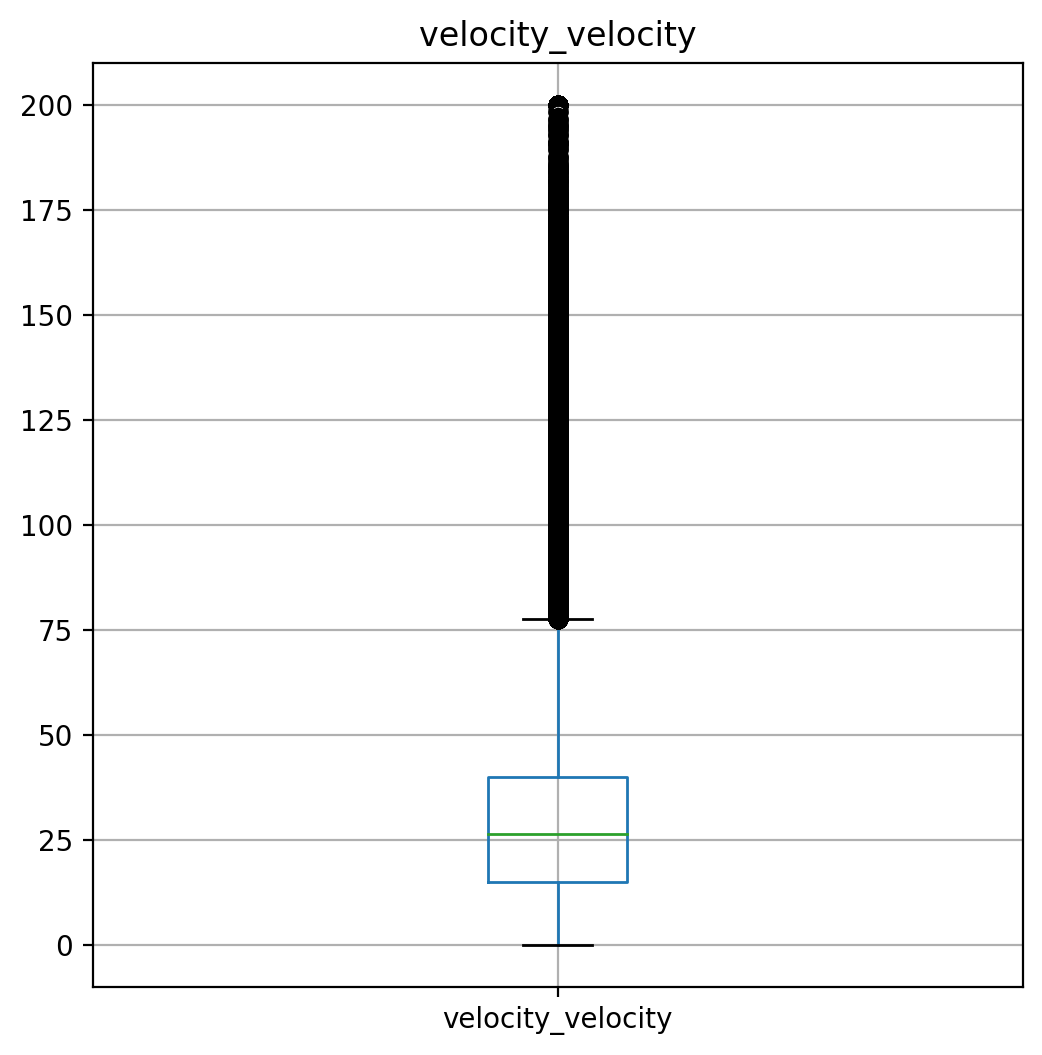

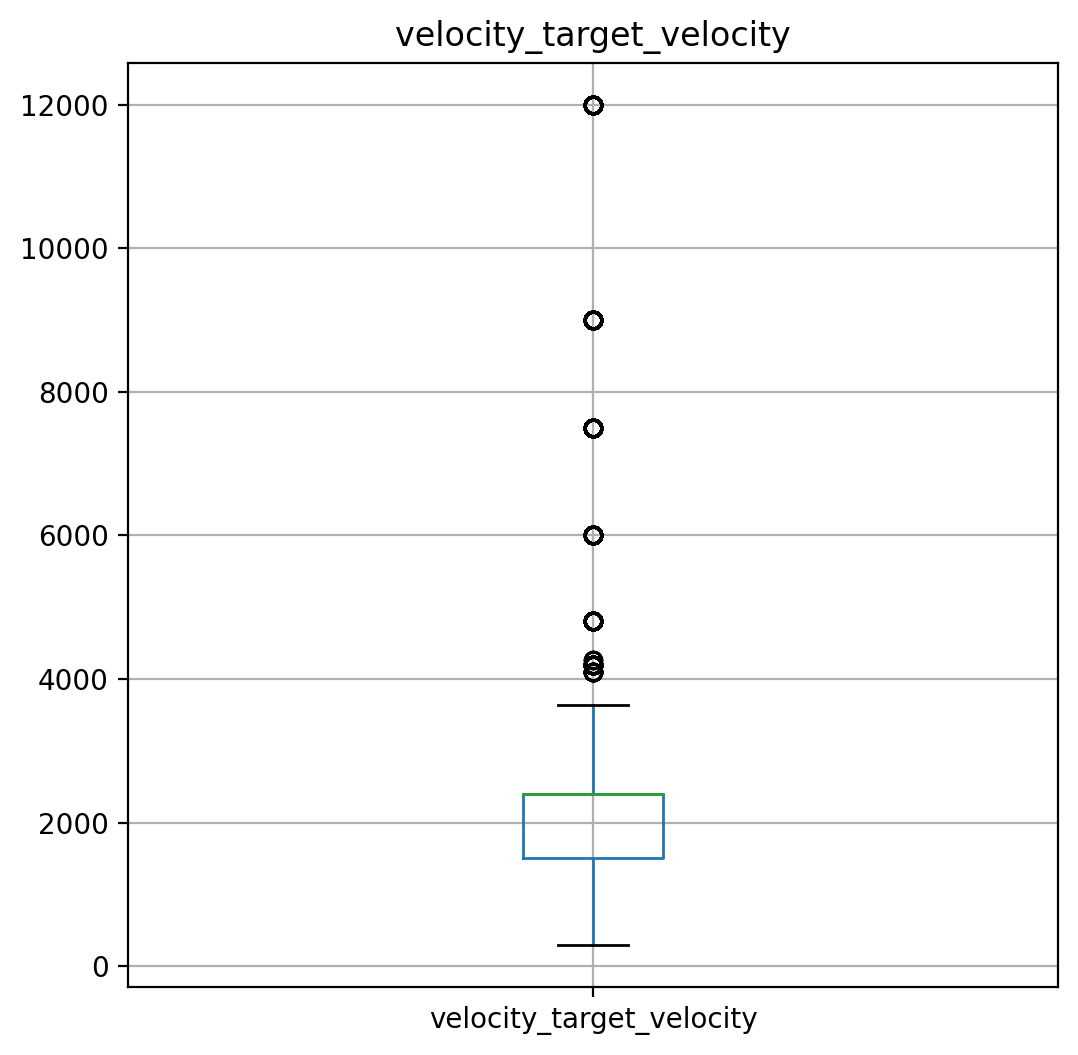

In [9]:
from matplotlib import pyplot as plt

# boxplot for each column
for col in all_df.columns:
    col_df = success_df[[col]]
    plt.figure(figsize=(6, 6))
    plt.title(col)
    col_df.boxplot()


# T-SNE

<Axes: xlabel='x', ylabel='y'>

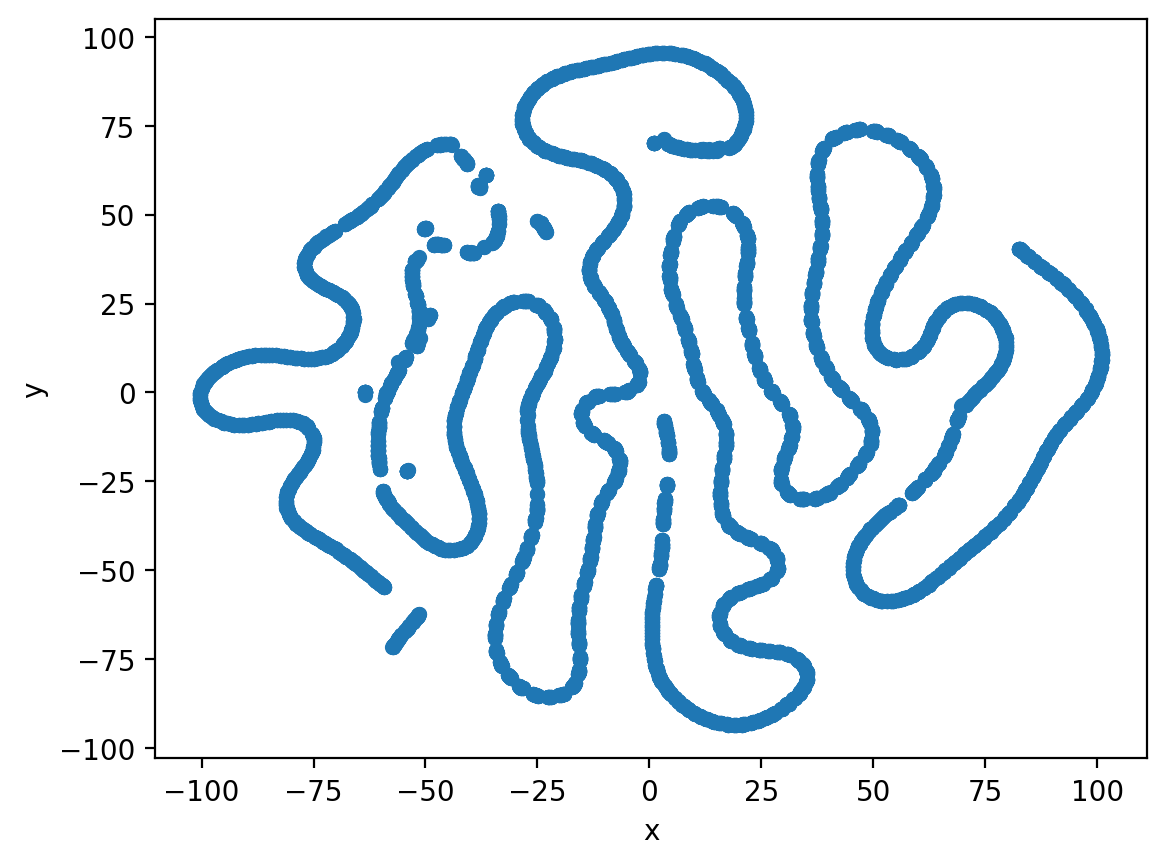

In [10]:
# tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

# remove all rows with NaNs and fit the tsne model
result = tsne.fit_transform(success_df[:10000])

# plot
pd.DataFrame(result, columns=['x', 'y']).plot.scatter(x='x', y='y')

# Take 1: Z-Score

In [11]:
from dataclasses import dataclass
from typing import Dict
import numpy as np

@dataclass
class MeanVariance:
    mean: np.float64
    variance: np.float64

mean_variance: Dict[str, MeanVariance] = {
    col: MeanVariance(success_df[col].mean(), success_df[col].var())
    for col in success_df.columns
}

mean_variance

{'datetime': MeanVariance(mean=1683485666.3236115, variance=2426734415416.865),
 'extruder_power_power': MeanVariance(mean=0.4588979722956635, variance=0.03978685184177195),
 'extruder_target_target': MeanVariance(mean=151.92179099852817, variance=7444.736876204956),
 'extruder_temperature_temperature': MeanVariance(mean=179.3151030753738, variance=3001.4950988809214),
 'extruder_velocity_velocity': MeanVariance(mean=0.5960199528279094, variance=26.055659641924553),
 'gas_value': MeanVariance(mean=133.556972654737, variance=1119.8642269870543),
 'heater_power_power': MeanVariance(mean=0.2947176170321537, variance=0.03086055291001408),
 'heater_target_target': MeanVariance(mean=40.08900766906809, variance=929.1237363593601),
 'heater_temperature_temperature': MeanVariance(mean=59.63830969091332, variance=79.04743753721192),
 'accelerometer_x': MeanVariance(mean=-0.018837983092416143, variance=0.00014070346353614696),
 'accelerometer_y': MeanVariance(mean=0.1418580482206213, variance=6.1

In [12]:
print('\t'.join(mean_variance.keys()))

datetime	extruder_power_power	extruder_target_target	extruder_temperature_temperature	extruder_velocity_velocity	gas_value	heater_power_power	heater_target_target	heater_temperature_temperature	accelerometer_x	accelerometer_y	accelerometer_z	magnetometer_x	magnetometer_y	magnetometer_z	gyroscope_x	gyroscope_y	gyroscope_z	mcu_upcoming_bytes	mcu_srtt	mcu_bytes_invalid	mcu_send_seq	mcu_retransmit_seq	mcu_rttvar	mcu_rto	mcu_bytes_retransmit	mcu_bytes_write	mcu_ready_bytes	mcu_freq	mcu_receive_seq	position_x	position_y	position_z	position_e	position_target_x	position_target_y	position_target_z	position_target_e	velocity_velocity	velocity_target_velocity


In [13]:
features = ['extruder_power_power', \
            'extruder_temperature_temperature', \
            'extruder_velocity_velocity', \
            'gas_value', \
            'heater_power_power', \
            'heater_temperature_temperature', \
            'accelerometer_x', \
            'accelerometer_y', \
            'accelerometer_z', \
            'magnetometer_x', \
            'magnetometer_y', \
            'magnetometer_z']

anomaly_threshold = 2 # 99.7% of data

def z_score(value: np.float64, mean_variance: MeanVariance) -> np.float64:
    return (value - mean_variance.mean) / np.sqrt(mean_variance.variance)

In [14]:
z_score_df = success_df[['datetime'] + features]
z_score_df[features] = z_score_df[features].apply(lambda x: x.apply(lambda d: z_score(d, mean_variance[x.name])), axis=0) 

anomalies_df = z_score_df.copy()
anomalies_df[features] = z_score_df[features].applymap(lambda x: (np.mean(x) > anomaly_threshold))

# count columns that contain true
result_df = anomalies_df[features].apply(lambda x: x.value_counts(), axis=1)


/tmp/ipykernel_248878/3212441110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_score_df[features] = z_score_df[features].apply(lambda x: x.apply(lambda d: z_score(d, mean_variance[x.name])), axis=0)


<Axes: >

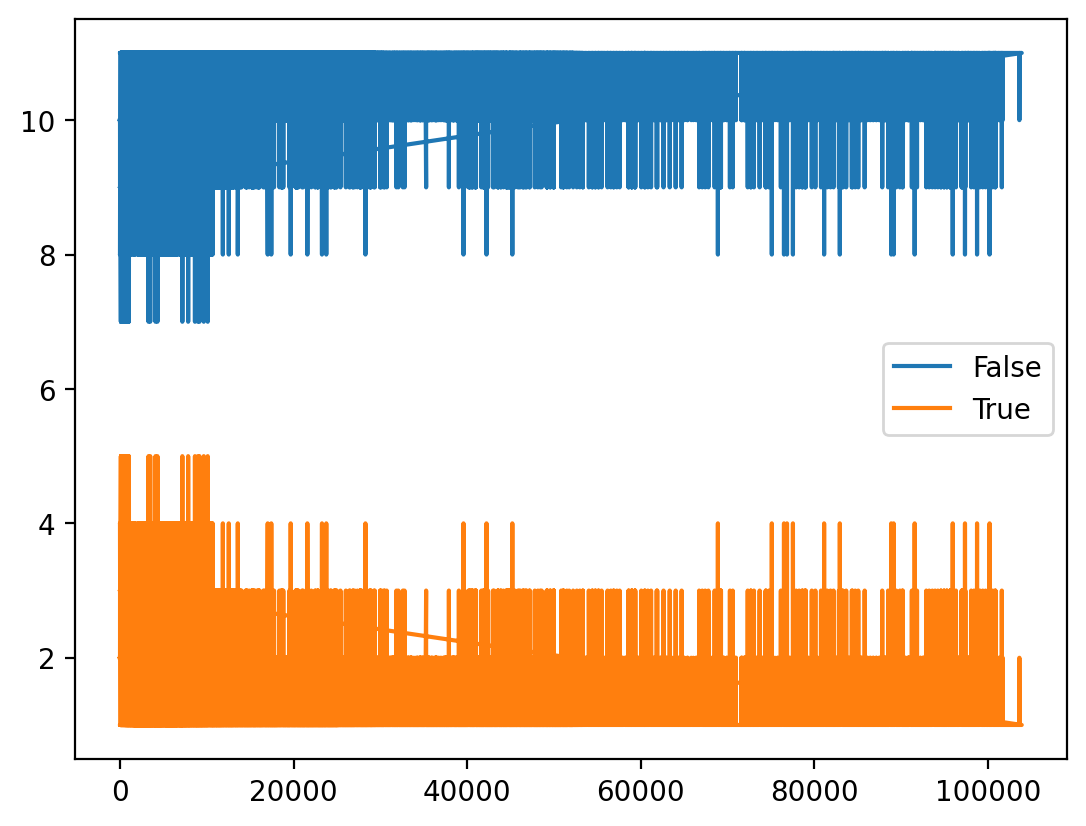

In [15]:
result_df[~result_df.isna().any(axis=1)].plot()

In [16]:
z_score_df = failure_df[['datetime'] + features]
z_score_df[features] = z_score_df[features].apply(lambda x: x.apply(lambda d: z_score(d, mean_variance[x.name])), axis=0) 

anomalies_df = z_score_df.copy()
anomalies_df[features] = z_score_df[features].applymap(lambda x: (np.mean(x) > anomaly_threshold))

# count columns that contain true
result_df = anomalies_df[features].apply(lambda x: x.value_counts(), axis=1)
result_df

/tmp/ipykernel_248878/3086852868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_score_df[features] = z_score_df[features].apply(lambda x: x.apply(lambda d: z_score(d, mean_variance[x.name])), axis=0)


,False,True
0,10.0,2.0
1,10.0,2.0
2,10.0,2.0
3,10.0,2.0
4,10.0,2.0
...,...,...
5730,12.0,NaN
5731,12.0,NaN
5732,12.0,NaN
5733,12.0,NaN


<Axes: >

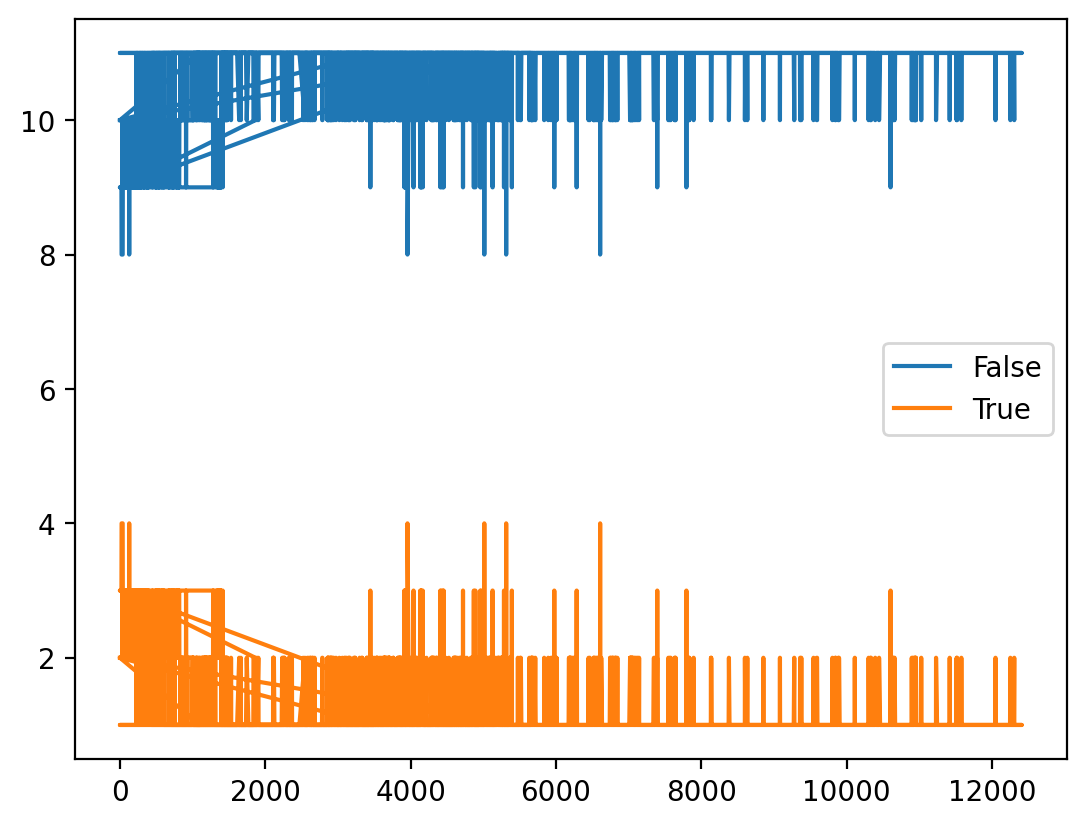

In [17]:
result_df[~result_df.isna().any(axis=1)].plot()


In [18]:
# todo: density plot über druckverlauf

# Take 2: LOF

In [19]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=2, metric='euclidean')
#prediction = lof.fit_predict(success_df)